In [3]:
%matplotlib inline

import os
import glob
#os.chdir("/cargo/public/catdata/gpq_nir/")

import xgboost as xgb
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
from astropy.table import Table
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    f1_score, 
    accuracy_score, 
    precision_score,
    recall_score,
    matthews_corrcoef,
    )

import json

import healpy as hp
import matplotlib.pyplot as plt
from astropy_healpix import HEALPix
from astropy.coordinates import Galactic
from astropy.coordinates import SkyCoord
import astropy.units as u

# 1. predict all gps sources

In [72]:
features = ['iz','zy','yj','jh','hk','iw1','zw1','yw1','jw1','hw1','kw1','w1w2']
clf1 = pickle.load(open('clf1-test6.pkl', 'rb'))
clf2 = pickle.load(open('clf2-test5.pkl', 'rb'))

In [73]:
# 加上每个源的predicted probability

def predict_gpq(df=None,filename='/cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0000.csv'):
    
#     df = pd.read_csv(filename)
    
    X1 = df[features].values
    predict_proba_1 = clf1.predict_proba(X1).T[0]
    extragal_99_index = np.where(predict_proba_1>0.99)[0].tolist()
    extragal_99 = df.iloc[extragal_99_index]
    extragal_99['predict_proba_1'] = predict_proba_1[extragal_99_index]
    extragal_99.reset_index(inplace=True, drop=True)

    X2 = extragal_99[features].values
    predict_proba_2 = clf2.predict_proba(X2).T[1]
    gpq_99_index = np.where(predict_proba_2>0.99)[0].tolist()
    gpq_99 = extragal_99.iloc[gpq_99_index]
    gpq_99['predict_proba_2'] = predict_proba_2[gpq_99_index]
    gpq_99.reset_index(inplace=True, drop=True)
    
    gpq_99['predict_proba'] = gpq_99['predict_proba_1']*gpq_99['predict_proba_2']  # 两步的概率相乘
    print(len(gpq_99),len(df), len(gpq_99)/len(df))
    
    save_path = '/cargo/public/catdata/gpq_nir/Predicted_GPQ_proba/goodph_gps-ps1-cat-'+filename[-8:-4]
    gpq_99.to_csv(save_path)
      

In [74]:
extension = 'csv'
all_filenames = [i for i in 
                 glob.glob('/cargo/public/catdata/gps-ps1-cat-goodph/*.{}'.format(extension))]

In [75]:
i = 0
total_num = 0
for f in all_filenames:
    i +=1
    df = pd.read_csv(f)
    total_num += len(df)
    predict_gpq(df,f)
    print(i,total_num, f)

<ipython-input-73-a5958f6e776a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extragal_99['predict_proba_1'] = predict_proba_1[extragal_99_index]
<ipython-input-73-a5958f6e776a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpq_99['predict_proba_2'] = predict_proba_2[gpq_99_index]
<ipython-input-73-a5958f6e776a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

1446 328187 0.00440602461401579
1 328187 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0656.csv
1900 353927 0.005368338668708519
2 682114 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0956.csv
619 348647 0.0017754347520558043
3 1030761 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0721.csv
761 318445 0.0023897376313021085
4 1349206 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0430.csv
891 339179 0.0026269315022451273
5 1688385 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0847.csv
1260 339465 0.0037117228580266005
6 2027850 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0035.csv
1722 382091 0.004506779798529669
7 2409941 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0807.csv
1015 352277 0.002881255375741249
8 2762218 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0349.csv
1235 281654 0.004384812571452917
9 3043872 /cargo/public/catdata/gps-ps1-c

741 344256 0.002152467930842164
71 23678387 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0557.csv
463 315042 0.0014696453171323188
72 23993429 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0803.csv
1569 321034 0.004887332805871029
73 24314463 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0358.csv
1243 360365 0.003449280590512397
74 24674828 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0390.csv
835 354486 0.0023555232082508194
75 25029314 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0949.csv
1836 362710 0.005061895177965868
76 25392024 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0223.csv
1168 351620 0.0033217678175302885
77 25743644 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0530.csv
1321 352996 0.003742252036850276
78 26096640 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0465.csv
1032 297330 0.0034708909292705077
79 26393970 /cargo/pub

1960 363520 0.005391725352112676
141 46875531 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0889.csv
2083 365202 0.005703692750861167
142 47240733 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0147.csv
561 301975 0.0018577696829207716
143 47542708 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0857.csv
1963 370722 0.005295072857828777
144 47913430 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0935.csv
874 347869 0.002512440027711581
145 48261299 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0452.csv
946 351804 0.002688997282577799
146 48613103 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0513.csv
1704 359249 0.004743228234455768
147 48972352 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0595.csv
1341 360353 0.0037213510085943504
148 49332705 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0760.csv
777 322553 0.0024089064432821893
149 49655258 /ca

1460 369287 0.003953564571728764
210 70132720 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0492.csv
948 313353 0.0030253420264047255
211 70446073 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0308.csv
927 334691 0.0027697189347786464
212 70780764 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0289.csv
1268 317490 0.003993826577215031
213 71098254 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0232.csv
2566 367961 0.0069735651332614055
214 71466215 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0461.csv
1619 382552 0.004232104393651059
215 71848767 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0411.csv
545 291918 0.001866962640193479
216 72140685 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0532.csv
1385 346540 0.0039966526230738155
217 72487225 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0084.csv
711 346185 0.0020538151566359027
218 72833410 /

1691 331189 0.005105845906717916
279 93086187 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0040.csv
1287 360656 0.0035684974047291602
280 93446843 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0198.csv
1508 342935 0.0043973347718955485
281 93789778 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0288.csv
1070 283323 0.0037766083233623815
282 94073101 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0377.csv
1412 364278 0.0038761605147716854
283 94437379 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0337.csv
1173 346076 0.003389428911568557
284 94783455 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0295.csv
833 338469 0.00246108210796262
285 95121924 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0533.csv
854 335022 0.0025490863286590135
286 95456946 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0936.csv
909 352329 0.002579974966579532
287 95809275 /

795 312798 0.0025415763527899793
348 115818415 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0902.csv
1310 309090 0.004238247759552234
349 116127505 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0698.csv
1181 320071 0.0036898063242218134
350 116447576 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0898.csv
1169 317994 0.003676169990628754
351 116765570 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0954.csv
1182 324642 0.003640933705435526
352 117090212 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0341.csv
1547 364449 0.004244764013620561
353 117454661 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0331.csv
1267 347680 0.003644155545329038
354 117802341 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0206.csv
808 331871 0.002434680945307062
355 118134212 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0184.csv
1237 334796 0.0036947872734441273
356 11

1576 368352 0.004278516201893841
417 138524366 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0374.csv
1472 318919 0.004615592046883378
418 138843285 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0679.csv
1103 343673 0.0032094461886735355
419 139186958 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0825.csv
645 362458 0.0017795165232937333
420 139549416 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0427.csv
499 289447 0.0017239771011618708
421 139838863 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0266.csv
1582 316450 0.004999209985779744
422 140155313 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0221.csv
1768 338912 0.00521669341894061
423 140494225 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0666.csv
1355 362742 0.0037354373080591714
424 140856967 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0108.csv
1575 363350 0.004334663547543691
425 14

2677 320637 0.008349005261401523
486 161435283 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0712.csv
812 366915 0.002213046618426611
487 161802198 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0141.csv
1130 304168 0.003715052207990321
488 162106366 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0829.csv
773 321739 0.0024025685415818413
489 162428105 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0755.csv
1162 350975 0.0033107771208775554
490 162779080 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0355.csv
1394 339821 0.004102159666412611
491 163118901 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0917.csv
1319 366110 0.0036027423451967986
492 163485011 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0861.csv
1123 327956 0.003424239837051312
493 163812967 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0953.csv
689 349412 0.001971884194017378
494 164

1355 347009 0.0039047978582688056
555 184701539 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0457.csv
1019 313189 0.003253626404503351
556 185014728 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0819.csv
692 347528 0.001991206463939596
557 185362256 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0076.csv
1213 354038 0.0034261858896502636
558 185716294 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0697.csv
626 334014 0.0018741729388588502
559 186050308 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0300.csv
850 352821 0.00240915365015121
560 186403129 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0821.csv
1355 350167 0.003869582227908398
561 186753296 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0278.csv
982 297974 0.003295589548081376
562 187051270 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0519.csv
1312 366236 0.0035823894974824975
563 1874

2031 328550 0.006181707502663217
624 207354447 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0965.csv
639 302351 0.0021134376932770193
625 207656798 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0139.csv
1014 332126 0.0030530581767160654
626 207988924 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0640.csv
1404 369004 0.0038048368039370847
627 208357928 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0637.csv
961 334329 0.0028744141250085994
628 208692257 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0692.csv
1380 301249 0.00458092806947077
629 208993506 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0281.csv
784 304974 0.0025707109458511217
630 209298480 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0506.csv
948 309543 0.003062579350849478
631 209608023 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0788.csv
1190 345514 0.003444144086780854
632 209

1428 358792 0.003980021851100359
693 230138954 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0644.csv
820 309051 0.0026532837622269463
694 230448005 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0938.csv
1303 333574 0.003906179738228999
695 230781579 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0044.csv
1232 357816 0.003443110425470074
696 231139395 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0579.csv
675 327674 0.002059974242692432
697 231467069 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0166.csv
797 341808 0.002331718391611665
698 231808877 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0354.csv
1136 341882 0.00332278388449816
699 232150759 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0853.csv
1899 339726 0.005589798837887003
700 232490485 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0445.csv
914 330155 0.0027683966621738273
701 232820

702 327652 0.0021425170607840024
762 253270891 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0424.csv
1459 355915 0.0040992933706081505
763 253626806 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0051.csv
1013 294981 0.0034341194856617884
764 253921787 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0194.csv
687 321288 0.0021382684694106224
765 254243075 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0169.csv
948 287606 0.0032961760185809754
766 254530681 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0661.csv
1232 362099 0.003402384430777218
767 254892780 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0326.csv
676 311339 0.002171266690006713
768 255204119 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0677.csv
1360 326108 0.0041703975370122786
769 255530227 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0791.csv
868 298810 0.0029048559285164486
770 2

1230 336187 0.0036586780571527156
831 276132842 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0371.csv
869 282294 0.0030783509390918686
832 276415136 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0225.csv
900 349373 0.0025760433691212545
833 276764509 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0884.csv
2241 386997 0.005790742563895844
834 277151506 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0719.csv
1496 362931 0.004121995641044716
835 277514437 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0730.csv
1778 351255 0.005061849653385717
836 277865692 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0638.csv
1563 319290 0.004895236305552946
837 278184982 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0635.csv
1007 335891 0.002997996373823651
838 278520873 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0329.csv
1049 337770 0.0031056636172543447
839 2

1841 356614 0.00516244454788651
900 299126413 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0067.csv
1194 343660 0.003474364197171623
901 299470073 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0155.csv
1062 350219 0.0030323883056030654
902 299820292 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0944.csv
924 328271 0.0028147475713663408
903 300148563 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0189.csv
1175 347995 0.0033764852943289417
904 300496558 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0726.csv
933 342982 0.0027202593722119527
905 300839540 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0143.csv
863 343861 0.002509735038285819
906 301183401 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0176.csv
1227 359984 0.0034084848215476245
907 301543385 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0267.csv
1380 348828 0.003956104441157246
908 30

888 319797 0.002776761508081689
969 322282000 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0083.csv
1260 351180 0.0035879036391594054
970 322633180 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0888.csv
1437 353455 0.0040655811913822126
971 322986635 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0722.csv
1720 328019 0.005243598693978092
972 323314654 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0254.csv
703 358163 0.0019627934767131165
973 323672817 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0256.csv
798 352493 0.0022638747436119298
974 324025310 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0649.csv
1286 355813 0.003614258051279745
975 324381123 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0439.csv
732 343403 0.002131606305128377
976 324724526 /cargo/public/catdata/gps-ps1-cat-goodph/qphSelCol_hgps-ps1-cat-0951.csv
1206 338731 0.0035603472962321132
977 32

In [ ]:
## 一共325673408个gpc样本

In [76]:
#combine all files in the list
# 加上每个源的predicted probability
all_filenames2 = [i for i in 
                 glob.glob('/cargo/public/catdata/gpq_nir/Predicted_GPQ_proba/*')]
i = 0
df_list = []
for f in all_filenames2:
    i += 1
    df_list.append(pd.read_csv(f))
    print(i)
    
combined_csv = pd.concat(df_list)
combined_csv.reset_index(inplace=True,drop=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [4]:
# # 加上每个源的predicted probability
# all_filenames2 = [i for i in 
#                  glob.glob('/cargo/public/catdata/gpq_nir/Predicted_GPQ_proba/*')]
# i = 0
# for f in all_filenames2:
#     i += 1
#     if i == 1:
#         combined_csv1 = pd.read_csv(f)
#     else:
#         combined_csv1 = pd.concat([pd.read_csv(f), combined_csv1])
#         combined_csv1.reset_index(drop=True, inplace=True)
#     print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [5]:
combined_csv.to_csv('/cargo/public/catdata/gpq_nir/combined_pred_gpq/combined_pred_gpq_proba.csv', index=False)

In [78]:
combined_csv.shape # 比test5降低了一点

(1145937, 62)

In [79]:
# 类星体占比
len(combined_csv)/325673408

0.003518669230740509

In [82]:
combined_csv.columns

Index(['Unnamed: 0', 'ra', 'dec', 'l', 'b', 'gps_pstar', 'gps_pgalaxy',
       'gps_pnoise', 'gps_psaturated', 'g', 'r', 'i', 'z', 'y', 'e_g', 'e_r',
       'e_i', 'e_z', 'e_y', 'jap', 'hap', 'kap', 'e_jap', 'e_hap', 'e_kap',
       'cat_pmra', 'cat_pmdec', 'cat_sigpmra', 'cat_sigpmdec', 'w1vega',
       'w2vega', 'e_w1', 'e_w2', 'cat_w1snr_pm', 'cat_w2snr_pm', 'cat_rchi2',
       'cat_nb', 'cat_na', 'cat_w1sat', 'cat_w2sat', 'w1ab', 'w2ab', 'jab',
       'hab', 'kab', 'iz', 'zy', 'yj', 'jh', 'hk', 'iw1', 'zw1', 'yw1', 'jw1',
       'hw1', 'kw1', 'w1w2', 'ebv', 'n64pix', 'predict_proba_1',
       'predict_proba_2', 'predict_proba'],
      dtype='object')

# 2. plot sky density of all predicted GPQs

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

# plt.rcParams["figure.figsize"] = (10,4) # 调整图片尺寸
plt.rcParams["figure.dpi"] = 100 # 提高图片分辨率

In [263]:
hp.nside2npix(256)

786432

The area per pix is 0.052 deg^2 and the highest density per pix is 22361.661


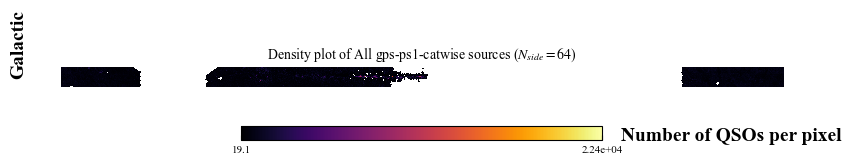

In [83]:
nside = 256
coord = SkyCoord(l=combined_csv['l'].values * u.degree,
                 b=combined_csv['b'].values * u.degree, frame='galactic')
ahp = HEALPix(nside=nside, order='ring', frame=Galactic())
combined_csv['n256pix'] = ahp.skycoord_to_healpix(coord)
hptb = combined_csv.groupby('n256pix').size()
npix = hp.nside2npix(nside)

pi = np.pi
ssky = 4 * pi * ((180 / pi)**2)
spix = ssky / npix
sig_max = hptb.max() / (ssky / npix)
print('The area per pix is {0:.3f} deg^2 and the highest density per\
 pix is {1:.3f}'.format(spix, sig_max))

hpxmap = np.zeros(npix, dtype=float)
for i in hptb.index.values:
    hpxmap[i] = hptb[i]  # 只填充有值的位置
hpxmap = hpxmap/spix
hpxmap[hpxmap == 0] = 'nan'
# hpxmap[hpxmap <= 0] = hp.pixelfunc.UNSEEN
# hpxmap_sm = hp.smoothing(hpxmap,fwhm=np.radians(1))

cartb = hp.cartview(hpxmap,
                    coord=["G"],
                    latra = [-5,5],  # 限制正负五度天区
                    cmap='inferno',
                    badcolor='w',
                    bgcolor='w',
                    unit="Number of QSOs per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Density plot of All gps-ps1-catwise sources ($N_{side}=64$)")


map_dump = pd.DataFrame(cartb)
cmpredgpq_b5 = map_dump.values

0.0 180.0 -180.0 180.0


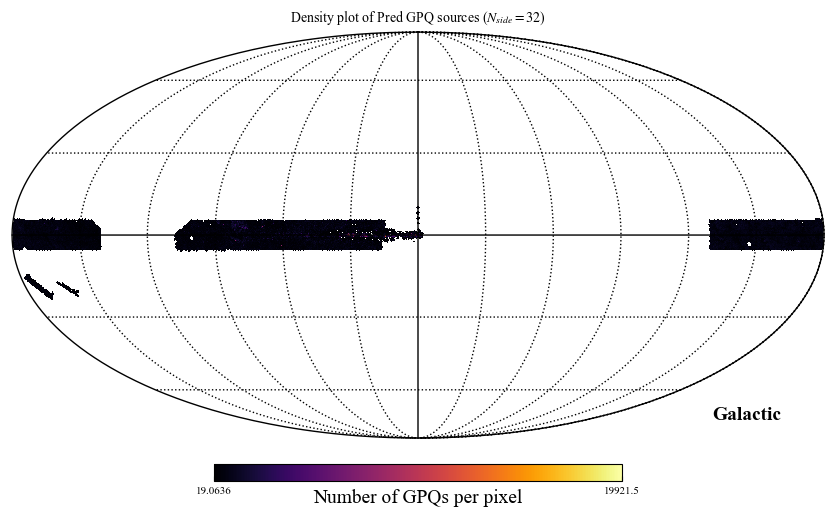

In [86]:
hp.mollview(hpxmap,
            coord=["G"],
            cmap='inferno',
            badcolor='w',
            bgcolor='w',
            unit="Number of GPQs per pixel",
            xsize=1000,
            title="Density plot of Pred GPQ sources ($N_{side}=32$)")
hp.graticule()
f = plt.gcf()
# f.savefig('/cargo/public/catdata/gpq_nir/Predicted_GPQ/densPredGPQ.pdf')

In [87]:
iring = np.arange(npix)
inest = hp.ring2nest(nside, iring)
hp.write_map('/cargo/public/catdata/gpq_nir/density_map/PredGPQ_healpixmap.fits',
             m=[iring, inest, hpxmap],
             coord='G',
             column_names=['iring', 'inest', 'map'],
             fits_IDL=False,
             overwrite=True)

setting the output map dtype to [dtype('int64'), dtype('int64'), dtype('float64')]


In [88]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE, family='serif')    # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.rc('font', family='serif')    # controls default text sizes
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

# plt.rcParams["figure.figsize"] = (10,4) # 调整图片尺寸
plt.rcParams["figure.dpi"] = 250 # 提高图片分辨率

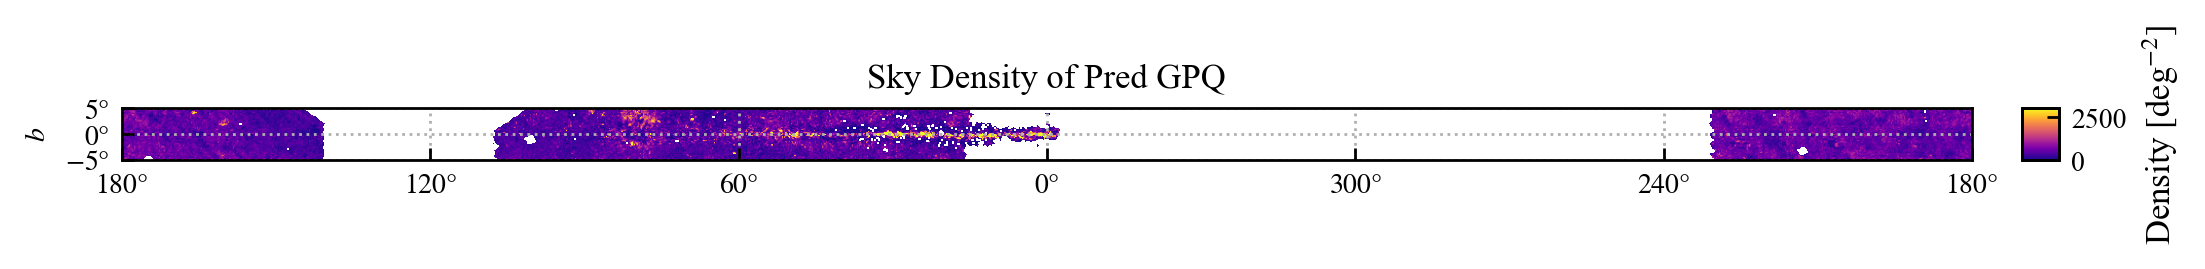

In [196]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='2%', pad=0.2)
im = ax1.imshow(cmpredgpq_b5.data,
                origin='lower',
                cmap='plasma',
             norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cmpredgpq_b5))
               )
ax1.set_xticks(np.arange(0, 1801, 300))
ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
                      r'$0\degree$',r'$300\degree$',r'$240\degree$',
                      r'$180\degree$'))
ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]')
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('Sky Density of Pred GPQ')


im.set_clim(0,3000)
plt.colorbar(im, cax=cax,orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]')
cbar1.ax.yaxis.label.set_size(10)


fig.savefig('/cargo/public/catdata/figures/Pred_GPQ_density_map.pdf',dpi=300)

In [97]:
np.nanmedian(cmpredgpq_b5)

476.5912410779182

In [ ]:
# 中间密度大，说明受恒星污染严重

# 3. calculate probability

P_real(y|x) ∝ P_biased(y|x) * P_real(y) / P_biased(y)  

P_biased(y|x): 机器学习predict出来的probability，在combined_csv1['predict_proba']，和每个源一一对应    
P_real(y): GPQ的先验概率，在/cargo/public/catdata/gpq_nir/density_map/combined_hpxmap.csv，和每个pixel一一对应  
P_biased(y): 机器学习训练集中GPQ样本所占的比例，为133372/(406379+133372+114910)~= 0.2  

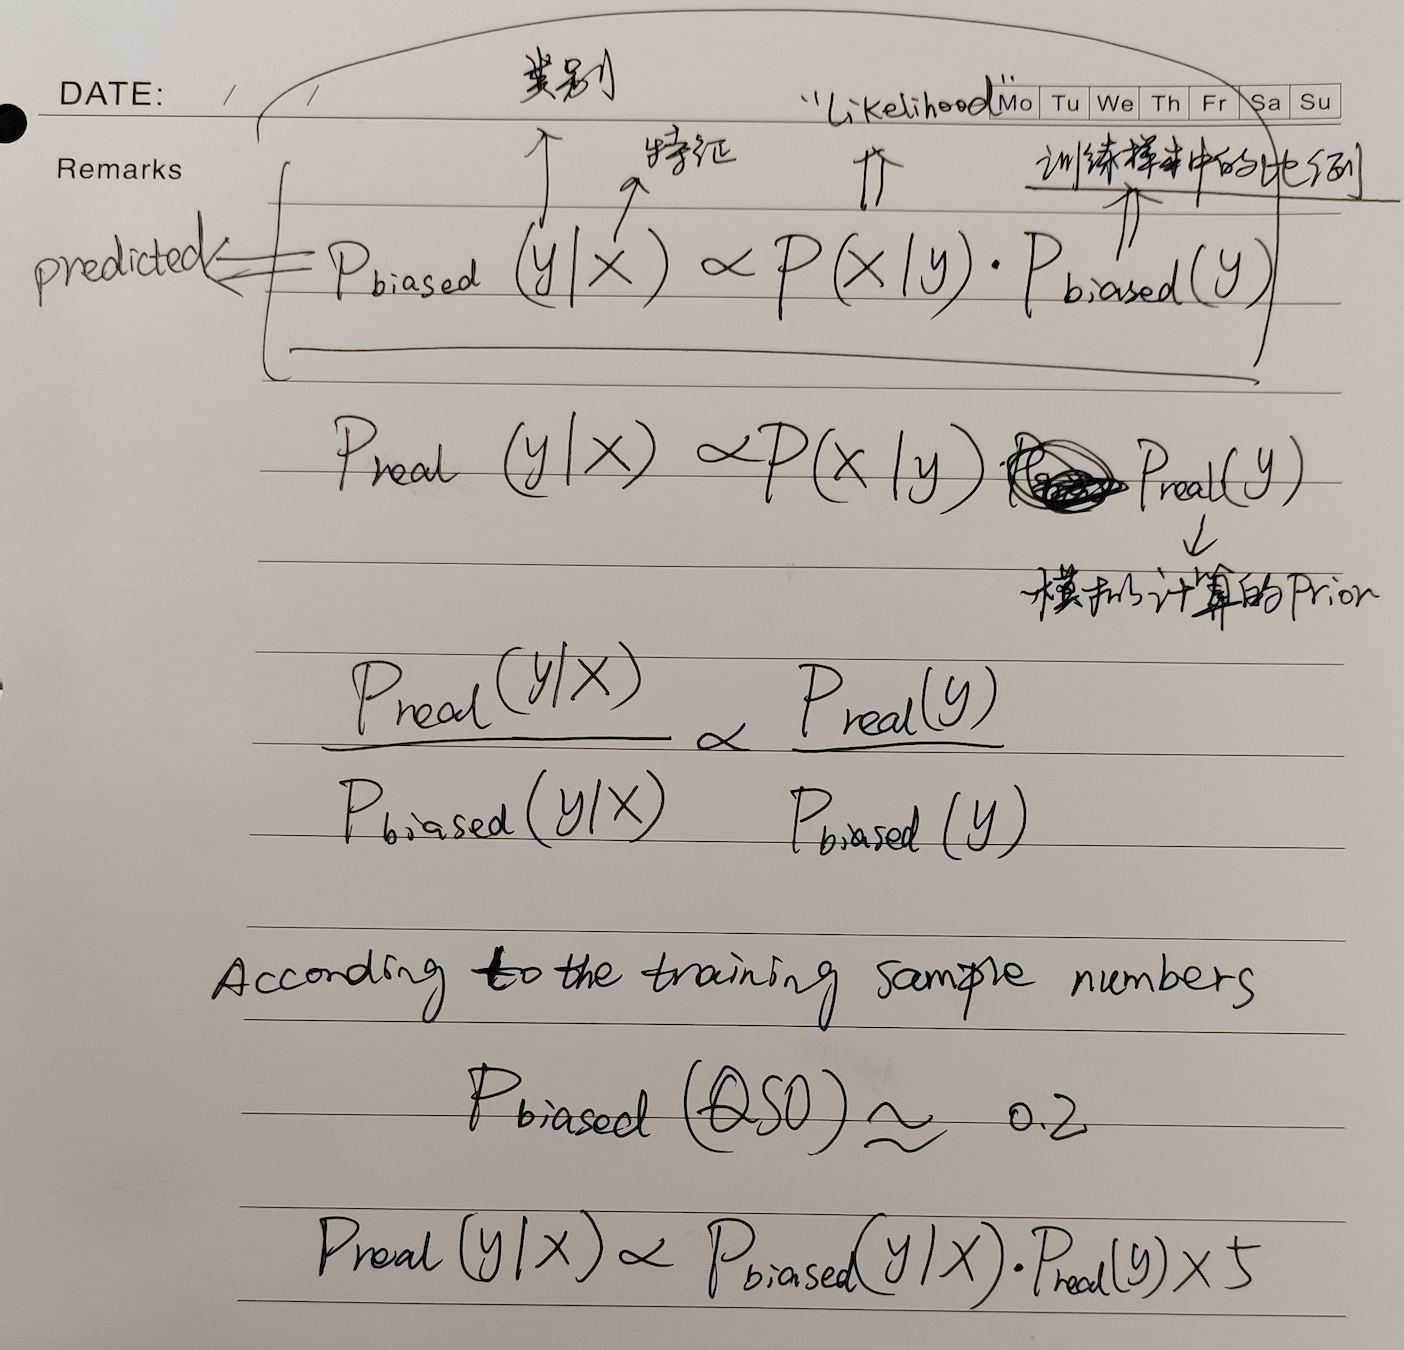

In [98]:
combined_pred_gpq = combined_csv.copy()

In [99]:
combined_pred_gpq.drop(columns=['Unnamed: 0'],inplace=True)

## 3.1. combine prior probability according to n64pix of each predicted GPQ

In [100]:
combined_hpxmap = pd.read_csv('/cargo/public/catdata/gpq_nir/density_map/combined_hpxmap.csv')
combined_hpxmap

iring     inest  D_all  D_goodph  D_old  D_goodqso  D_new_  \
0            0.0   65535.0    NaN       NaN    NaN  38.127299     NaN   
1            1.0  131071.0    NaN       NaN    NaN  38.127299     NaN   
2            2.0  196607.0    NaN       NaN    NaN  19.063650     NaN   
3            3.0  262143.0    NaN       NaN    NaN  38.127299     NaN   
4            4.0   65534.0    NaN       NaN    NaN  95.318248     NaN   
...          ...       ...    ...       ...    ...        ...     ...   
786427  786427.0  720897.0    NaN       NaN    NaN        NaN     NaN   
786428  786428.0  524288.0    NaN       NaN    NaN        NaN     NaN   
786429  786429.0  589824.0    NaN       NaN    NaN        NaN     NaN   
786430  786430.0  655360.0    NaN       NaN    NaN        NaN     NaN   
786431  786431.0  720896.0    NaN       NaN    NaN        NaN     NaN   

        D_new_low  P_prior      l          b  
0             NaN      NaN   45.0  89.817258  
1             NaN      NaN  135.0  89.817258  
2             NaN      NaN  225.0  89.817258  
3             NaN      NaN  315.0  89.817258  
4             NaN      NaN   22.5  89.634517  
...           ...      ...    ...        ...  
786427        NaN      NaN  337.5 -89.634517  
786428        NaN      NaN   45.0 -89.817258  
786429        NaN      NaN  135.0 -89.817258  
786430        NaN      NaN  225.0 -89.817258  
786431        NaN      NaN  315.0 -89.817258  

[786432 rows x 11 columns]

combined_hpxmap的index和n256pix一一对应

In [101]:
combined_hpxmap[~combined_hpxmap.P_prior.isnull()]

iring     inest          D_all  D_goodph      D_old  D_goodqso  \
357934  357934.0  290141.0  553360.558191   11630.0  19.063650        NaN   
357938  357938.0  291501.0  887050.681544   17017.0  19.063650        NaN   
357940  357940.0  291505.0  908173.205348   17738.0  19.063650        NaN   
357941  357941.0  291486.0  938941.935872   18032.0  19.063650        NaN   
357944  357944.0  291521.0  783325.363836   17315.0  38.127299        NaN   
...          ...       ...            ...       ...        ...        ...   
428168  428168.0  720189.0  135523.485313    3644.0  38.127299        NaN   
428169  428169.0  720226.0  122312.376110    3254.0  19.063650        NaN   
428170  428170.0  720225.0  144445.273346    3765.0  19.063650        NaN   
428171  428171.0  720206.0  133941.202393    3230.0  19.063650        NaN   
428172  428172.0  720205.0  146446.956558    3426.0  19.063650        NaN   

          D_new_  D_new_low   P_prior           l         b  
357934  0.400661  15.406013  0.001325   16.347656  5.079716  
357938  0.365713  14.062201  0.000826   17.753906  5.079716  
357940  0.372342  14.317089  0.000807   18.457031  5.079716  
357941  0.366110  14.077447  0.000781   18.808594  5.079716  
357944  0.842784  32.406270  0.001872   19.863281  5.079716  
...          ...        ...       ...         ...       ...  
428168  1.025179  39.419630  0.010818  227.988281 -5.079716  
428169  0.507170  19.501405  0.005993  228.339844 -5.079716  
428170  0.496899  19.106467  0.005075  228.691406 -5.079716  
428171  0.459721  17.676940  0.005473  229.042969 -5.079716  
428172  0.445978  17.148485  0.005005  229.394531 -5.079716  

[25247 rows x 11 columns]

In [103]:
combined_pred_gpq.columns

Index(['ra', 'dec', 'l', 'b', 'gps_pstar', 'gps_pgalaxy', 'gps_pnoise',
       'gps_psaturated', 'g', 'r', 'i', 'z', 'y', 'e_g', 'e_r', 'e_i', 'e_z',
       'e_y', 'jap', 'hap', 'kap', 'e_jap', 'e_hap', 'e_kap', 'cat_pmra',
       'cat_pmdec', 'cat_sigpmra', 'cat_sigpmdec', 'w1vega', 'w2vega', 'e_w1',
       'e_w2', 'cat_w1snr_pm', 'cat_w2snr_pm', 'cat_rchi2', 'cat_nb', 'cat_na',
       'cat_w1sat', 'cat_w2sat', 'w1ab', 'w2ab', 'jab', 'hab', 'kab', 'iz',
       'zy', 'yj', 'jh', 'hk', 'iw1', 'zw1', 'yw1', 'jw1', 'hw1', 'kw1',
       'w1w2', 'ebv', 'n64pix', 'predict_proba_1', 'predict_proba_2',
       'predict_proba', 'n256pix'],
      dtype='object')

In [105]:
combined_hpxmap_b5 = combined_hpxmap.query('-5<b<5')
for i in combined_hpxmap_b5.index.values:
    print(i)
    combined_pred_gpq.loc[combined_pred_gpq.n256pix==i,'P_prior'] = combined_hpxmap.iloc[i].P_prior

358912
358913
358914
358915
358916
358917
358918
358919
358920
358921
358922
358923
358924
358925
358926
358927
358928
358929
358930
358931
358932
358933
358934
358935
358936
358937
358938
358939
358940
358941
358942
358943
358944
358945
358946
358947
358948
358949
358950
358951
358952
358953
358954
358955
358956
358957
358958
358959
358960
358961
358962
358963
358964
358965
358966
358967
358968
358969
358970
358971
358972
358973
358974
358975
358976
358977
358978
358979
358980
358981
358982
358983
358984
358985
358986
358987
358988
358989
358990
358991
358992
358993
358994
358995
358996
358997
358998
358999
359000
359001
359002
359003
359004
359005
359006
359007
359008
359009
359010
359011
359012
359013
359014
359015
359016
359017
359018
359019
359020
359021
359022
359023
359024
359025
359026
359027
359028
359029
359030
359031
359032
359033
359034
359035
359036
359037
359038
359039
359040
359041
359042
359043
359044
359045
359046
359047
359048
359049
359050
359051
359052
359053
359054

360087
360088
360089
360090
360091
360092
360093
360094
360095
360096
360097
360098
360099
360100
360101
360102
360103
360104
360105
360106
360107
360108
360109
360110
360111
360112
360113
360114
360115
360116
360117
360118
360119
360120
360121
360122
360123
360124
360125
360126
360127
360128
360129
360130
360131
360132
360133
360134
360135
360136
360137
360138
360139
360140
360141
360142
360143
360144
360145
360146
360147
360148
360149
360150
360151
360152
360153
360154
360155
360156
360157
360158
360159
360160
360161
360162
360163
360164
360165
360166
360167
360168
360169
360170
360171
360172
360173
360174
360175
360176
360177
360178
360179
360180
360181
360182
360183
360184
360185
360186
360187
360188
360189
360190
360191
360192
360193
360194
360195
360196
360197
360198
360199
360200
360201
360202
360203
360204
360205
360206
360207
360208
360209
360210
360211
360212
360213
360214
360215
360216
360217
360218
360219
360220
360221
360222
360223
360224
360225
360226
360227
360228
360229

361262
361263
361264
361265
361266
361267
361268
361269
361270
361271
361272
361273
361274
361275
361276
361277
361278
361279
361280
361281
361282
361283
361284
361285
361286
361287
361288
361289
361290
361291
361292
361293
361294
361295
361296
361297
361298
361299
361300
361301
361302
361303
361304
361305
361306
361307
361308
361309
361310
361311
361312
361313
361314
361315
361316
361317
361318
361319
361320
361321
361322
361323
361324
361325
361326
361327
361328
361329
361330
361331
361332
361333
361334
361335
361336
361337
361338
361339
361340
361341
361342
361343
361344
361345
361346
361347
361348
361349
361350
361351
361352
361353
361354
361355
361356
361357
361358
361359
361360
361361
361362
361363
361364
361365
361366
361367
361368
361369
361370
361371
361372
361373
361374
361375
361376
361377
361378
361379
361380
361381
361382
361383
361384
361385
361386
361387
361388
361389
361390
361391
361392
361393
361394
361395
361396
361397
361398
361399
361400
361401
361402
361403
361404

362433
362434
362435
362436
362437
362438
362439
362440
362441
362442
362443
362444
362445
362446
362447
362448
362449
362450
362451
362452
362453
362454
362455
362456
362457
362458
362459
362460
362461
362462
362463
362464
362465
362466
362467
362468
362469
362470
362471
362472
362473
362474
362475
362476
362477
362478
362479
362480
362481
362482
362483
362484
362485
362486
362487
362488
362489
362490
362491
362492
362493
362494
362495
362496
362497
362498
362499
362500
362501
362502
362503
362504
362505
362506
362507
362508
362509
362510
362511
362512
362513
362514
362515
362516
362517
362518
362519
362520
362521
362522
362523
362524
362525
362526
362527
362528
362529
362530
362531
362532
362533
362534
362535
362536
362537
362538
362539
362540
362541
362542
362543
362544
362545
362546
362547
362548
362549
362550
362551
362552
362553
362554
362555
362556
362557
362558
362559
362560
362561
362562
362563
362564
362565
362566
362567
362568
362569
362570
362571
362572
362573
362574
362575

363618
363619
363620
363621
363622
363623
363624
363625
363626
363627
363628
363629
363630
363631
363632
363633
363634
363635
363636
363637
363638
363639
363640
363641
363642
363643
363644
363645
363646
363647
363648
363649
363650
363651
363652
363653
363654
363655
363656
363657
363658
363659
363660
363661
363662
363663
363664
363665
363666
363667
363668
363669
363670
363671
363672
363673
363674
363675
363676
363677
363678
363679
363680
363681
363682
363683
363684
363685
363686
363687
363688
363689
363690
363691
363692
363693
363694
363695
363696
363697
363698
363699
363700
363701
363702
363703
363704
363705
363706
363707
363708
363709
363710
363711
363712
363713
363714
363715
363716
363717
363718
363719
363720
363721
363722
363723
363724
363725
363726
363727
363728
363729
363730
363731
363732
363733
363734
363735
363736
363737
363738
363739
363740
363741
363742
363743
363744
363745
363746
363747
363748
363749
363750
363751
363752
363753
363754
363755
363756
363757
363758
363759
363760

364790
364791
364792
364793
364794
364795
364796
364797
364798
364799
364800
364801
364802
364803
364804
364805
364806
364807
364808
364809
364810
364811
364812
364813
364814
364815
364816
364817
364818
364819
364820
364821
364822
364823
364824
364825
364826
364827
364828
364829
364830
364831
364832
364833
364834
364835
364836
364837
364838
364839
364840
364841
364842
364843
364844
364845
364846
364847
364848
364849
364850
364851
364852
364853
364854
364855
364856
364857
364858
364859
364860
364861
364862
364863
364864
364865
364866
364867
364868
364869
364870
364871
364872
364873
364874
364875
364876
364877
364878
364879
364880
364881
364882
364883
364884
364885
364886
364887
364888
364889
364890
364891
364892
364893
364894
364895
364896
364897
364898
364899
364900
364901
364902
364903
364904
364905
364906
364907
364908
364909
364910
364911
364912
364913
364914
364915
364916
364917
364918
364919
364920
364921
364922
364923
364924
364925
364926
364927
364928
364929
364930
364931
364932

365966
365967
365968
365969
365970
365971
365972
365973
365974
365975
365976
365977
365978
365979
365980
365981
365982
365983
365984
365985
365986
365987
365988
365989
365990
365991
365992
365993
365994
365995
365996
365997
365998
365999
366000
366001
366002
366003
366004
366005
366006
366007
366008
366009
366010
366011
366012
366013
366014
366015
366016
366017
366018
366019
366020
366021
366022
366023
366024
366025
366026
366027
366028
366029
366030
366031
366032
366033
366034
366035
366036
366037
366038
366039
366040
366041
366042
366043
366044
366045
366046
366047
366048
366049
366050
366051
366052
366053
366054
366055
366056
366057
366058
366059
366060
366061
366062
366063
366064
366065
366066
366067
366068
366069
366070
366071
366072
366073
366074
366075
366076
366077
366078
366079
366080
366081
366082
366083
366084
366085
366086
366087
366088
366089
366090
366091
366092
366093
366094
366095
366096
366097
366098
366099
366100
366101
366102
366103
366104
366105
366106
366107
366108

367141
367142
367143
367144
367145
367146
367147
367148
367149
367150
367151
367152
367153
367154
367155
367156
367157
367158
367159
367160
367161
367162
367163
367164
367165
367166
367167
367168
367169
367170
367171
367172
367173
367174
367175
367176
367177
367178
367179
367180
367181
367182
367183
367184
367185
367186
367187
367188
367189
367190
367191
367192
367193
367194
367195
367196
367197
367198
367199
367200
367201
367202
367203
367204
367205
367206
367207
367208
367209
367210
367211
367212
367213
367214
367215
367216
367217
367218
367219
367220
367221
367222
367223
367224
367225
367226
367227
367228
367229
367230
367231
367232
367233
367234
367235
367236
367237
367238
367239
367240
367241
367242
367243
367244
367245
367246
367247
367248
367249
367250
367251
367252
367253
367254
367255
367256
367257
367258
367259
367260
367261
367262
367263
367264
367265
367266
367267
367268
367269
367270
367271
367272
367273
367274
367275
367276
367277
367278
367279
367280
367281
367282
367283

368321
368322
368323
368324
368325
368326
368327
368328
368329
368330
368331
368332
368333
368334
368335
368336
368337
368338
368339
368340
368341
368342
368343
368344
368345
368346
368347
368348
368349
368350
368351
368352
368353
368354
368355
368356
368357
368358
368359
368360
368361
368362
368363
368364
368365
368366
368367
368368
368369
368370
368371
368372
368373
368374
368375
368376
368377
368378
368379
368380
368381
368382
368383
368384
368385
368386
368387
368388
368389
368390
368391
368392
368393
368394
368395
368396
368397
368398
368399
368400
368401
368402
368403
368404
368405
368406
368407
368408
368409
368410
368411
368412
368413
368414
368415
368416
368417
368418
368419
368420
368421
368422
368423
368424
368425
368426
368427
368428
368429
368430
368431
368432
368433
368434
368435
368436
368437
368438
368439
368440
368441
368442
368443
368444
368445
368446
368447
368448
368449
368450
368451
368452
368453
368454
368455
368456
368457
368458
368459
368460
368461
368462
368463

369511
369512
369513
369514
369515
369516
369517
369518
369519
369520
369521
369522
369523
369524
369525
369526
369527
369528
369529
369530
369531
369532
369533
369534
369535
369536
369537
369538
369539
369540
369541
369542
369543
369544
369545
369546
369547
369548
369549
369550
369551
369552
369553
369554
369555
369556
369557
369558
369559
369560
369561
369562
369563
369564
369565
369566
369567
369568
369569
369570
369571
369572
369573
369574
369575
369576
369577
369578
369579
369580
369581
369582
369583
369584
369585
369586
369587
369588
369589
369590
369591
369592
369593
369594
369595
369596
369597
369598
369599
369600
369601
369602
369603
369604
369605
369606
369607
369608
369609
369610
369611
369612
369613
369614
369615
369616
369617
369618
369619
369620
369621
369622
369623
369624
369625
369626
369627
369628
369629
369630
369631
369632
369633
369634
369635
369636
369637
369638
369639
369640
369641
369642
369643
369644
369645
369646
369647
369648
369649
369650
369651
369652
369653

370700
370701
370702
370703
370704
370705
370706
370707
370708
370709
370710
370711
370712
370713
370714
370715
370716
370717
370718
370719
370720
370721
370722
370723
370724
370725
370726
370727
370728
370729
370730
370731
370732
370733
370734
370735
370736
370737
370738
370739
370740
370741
370742
370743
370744
370745
370746
370747
370748
370749
370750
370751
370752
370753
370754
370755
370756
370757
370758
370759
370760
370761
370762
370763
370764
370765
370766
370767
370768
370769
370770
370771
370772
370773
370774
370775
370776
370777
370778
370779
370780
370781
370782
370783
370784
370785
370786
370787
370788
370789
370790
370791
370792
370793
370794
370795
370796
370797
370798
370799
370800
370801
370802
370803
370804
370805
370806
370807
370808
370809
370810
370811
370812
370813
370814
370815
370816
370817
370818
370819
370820
370821
370822
370823
370824
370825
370826
370827
370828
370829
370830
370831
370832
370833
370834
370835
370836
370837
370838
370839
370840
370841
370842

371880
371881
371882
371883
371884
371885
371886
371887
371888
371889
371890
371891
371892
371893
371894
371895
371896
371897
371898
371899
371900
371901
371902
371903
371904
371905
371906
371907
371908
371909
371910
371911
371912
371913
371914
371915
371916
371917
371918
371919
371920
371921
371922
371923
371924
371925
371926
371927
371928
371929
371930
371931
371932
371933
371934
371935
371936
371937
371938
371939
371940
371941
371942
371943
371944
371945
371946
371947
371948
371949
371950
371951
371952
371953
371954
371955
371956
371957
371958
371959
371960
371961
371962
371963
371964
371965
371966
371967
371968
371969
371970
371971
371972
371973
371974
371975
371976
371977
371978
371979
371980
371981
371982
371983
371984
371985
371986
371987
371988
371989
371990
371991
371992
371993
371994
371995
371996
371997
371998
371999
372000
372001
372002
372003
372004
372005
372006
372007
372008
372009
372010
372011
372012
372013
372014
372015
372016
372017
372018
372019
372020
372021
372022

373059
373060
373061
373062
373063
373064
373065
373066
373067
373068
373069
373070
373071
373072
373073
373074
373075
373076
373077
373078
373079
373080
373081
373082
373083
373084
373085
373086
373087
373088
373089
373090
373091
373092
373093
373094
373095
373096
373097
373098
373099
373100
373101
373102
373103
373104
373105
373106
373107
373108
373109
373110
373111
373112
373113
373114
373115
373116
373117
373118
373119
373120
373121
373122
373123
373124
373125
373126
373127
373128
373129
373130
373131
373132
373133
373134
373135
373136
373137
373138
373139
373140
373141
373142
373143
373144
373145
373146
373147
373148
373149
373150
373151
373152
373153
373154
373155
373156
373157
373158
373159
373160
373161
373162
373163
373164
373165
373166
373167
373168
373169
373170
373171
373172
373173
373174
373175
373176
373177
373178
373179
373180
373181
373182
373183
373184
373185
373186
373187
373188
373189
373190
373191
373192
373193
373194
373195
373196
373197
373198
373199
373200
373201

374235
374236
374237
374238
374239
374240
374241
374242
374243
374244
374245
374246
374247
374248
374249
374250
374251
374252
374253
374254
374255
374256
374257
374258
374259
374260
374261
374262
374263
374264
374265
374266
374267
374268
374269
374270
374271
374272
374273
374274
374275
374276
374277
374278
374279
374280
374281
374282
374283
374284
374285
374286
374287
374288
374289
374290
374291
374292
374293
374294
374295
374296
374297
374298
374299
374300
374301
374302
374303
374304
374305
374306
374307
374308
374309
374310
374311
374312
374313
374314
374315
374316
374317
374318
374319
374320
374321
374322
374323
374324
374325
374326
374327
374328
374329
374330
374331
374332
374333
374334
374335
374336
374337
374338
374339
374340
374341
374342
374343
374344
374345
374346
374347
374348
374349
374350
374351
374352
374353
374354
374355
374356
374357
374358
374359
374360
374361
374362
374363
374364
374365
374366
374367
374368
374369
374370
374371
374372
374373
374374
374375
374376
374377

375429
375430
375431
375432
375433
375434
375435
375436
375437
375438
375439
375440
375441
375442
375443
375444
375445
375446
375447
375448
375449
375450
375451
375452
375453
375454
375455
375456
375457
375458
375459
375460
375461
375462
375463
375464
375465
375466
375467
375468
375469
375470
375471
375472
375473
375474
375475
375476
375477
375478
375479
375480
375481
375482
375483
375484
375485
375486
375487
375488
375489
375490
375491
375492
375493
375494
375495
375496
375497
375498
375499
375500
375501
375502
375503
375504
375505
375506
375507
375508
375509
375510
375511
375512
375513
375514
375515
375516
375517
375518
375519
375520
375521
375522
375523
375524
375525
375526
375527
375528
375529
375530
375531
375532
375533
375534
375535
375536
375537
375538
375539
375540
375541
375542
375543
375544
375545
375546
375547
375548
375549
375550
375551
375552
375553
375554
375555
375556
375557
375558
375559
375560
375561
375562
375563
375564
375565
375566
375567
375568
375569
375570
375571

376603
376604
376605
376606
376607
376608
376609
376610
376611
376612
376613
376614
376615
376616
376617
376618
376619
376620
376621
376622
376623
376624
376625
376626
376627
376628
376629
376630
376631
376632
376633
376634
376635
376636
376637
376638
376639
376640
376641
376642
376643
376644
376645
376646
376647
376648
376649
376650
376651
376652
376653
376654
376655
376656
376657
376658
376659
376660
376661
376662
376663
376664
376665
376666
376667
376668
376669
376670
376671
376672
376673
376674
376675
376676
376677
376678
376679
376680
376681
376682
376683
376684
376685
376686
376687
376688
376689
376690
376691
376692
376693
376694
376695
376696
376697
376698
376699
376700
376701
376702
376703
376704
376705
376706
376707
376708
376709
376710
376711
376712
376713
376714
376715
376716
376717
376718
376719
376720
376721
376722
376723
376724
376725
376726
376727
376728
376729
376730
376731
376732
376733
376734
376735
376736
376737
376738
376739
376740
376741
376742
376743
376744
376745

377781
377782
377783
377784
377785
377786
377787
377788
377789
377790
377791
377792
377793
377794
377795
377796
377797
377798
377799
377800
377801
377802
377803
377804
377805
377806
377807
377808
377809
377810
377811
377812
377813
377814
377815
377816
377817
377818
377819
377820
377821
377822
377823
377824
377825
377826
377827
377828
377829
377830
377831
377832
377833
377834
377835
377836
377837
377838
377839
377840
377841
377842
377843
377844
377845
377846
377847
377848
377849
377850
377851
377852
377853
377854
377855
377856
377857
377858
377859
377860
377861
377862
377863
377864
377865
377866
377867
377868
377869
377870
377871
377872
377873
377874
377875
377876
377877
377878
377879
377880
377881
377882
377883
377884
377885
377886
377887
377888
377889
377890
377891
377892
377893
377894
377895
377896
377897
377898
377899
377900
377901
377902
377903
377904
377905
377906
377907
377908
377909
377910
377911
377912
377913
377914
377915
377916
377917
377918
377919
377920
377921
377922
377923

378958
378959
378960
378961
378962
378963
378964
378965
378966
378967
378968
378969
378970
378971
378972
378973
378974
378975
378976
378977
378978
378979
378980
378981
378982
378983
378984
378985
378986
378987
378988
378989
378990
378991
378992
378993
378994
378995
378996
378997
378998
378999
379000
379001
379002
379003
379004
379005
379006
379007
379008
379009
379010
379011
379012
379013
379014
379015
379016
379017
379018
379019
379020
379021
379022
379023
379024
379025
379026
379027
379028
379029
379030
379031
379032
379033
379034
379035
379036
379037
379038
379039
379040
379041
379042
379043
379044
379045
379046
379047
379048
379049
379050
379051
379052
379053
379054
379055
379056
379057
379058
379059
379060
379061
379062
379063
379064
379065
379066
379067
379068
379069
379070
379071
379072
379073
379074
379075
379076
379077
379078
379079
379080
379081
379082
379083
379084
379085
379086
379087
379088
379089
379090
379091
379092
379093
379094
379095
379096
379097
379098
379099
379100

380134
380135
380136
380137
380138
380139
380140
380141
380142
380143
380144
380145
380146
380147
380148
380149
380150
380151
380152
380153
380154
380155
380156
380157
380158
380159
380160
380161
380162
380163
380164
380165
380166
380167
380168
380169
380170
380171
380172
380173
380174
380175
380176
380177
380178
380179
380180
380181
380182
380183
380184
380185
380186
380187
380188
380189
380190
380191
380192
380193
380194
380195
380196
380197
380198
380199
380200
380201
380202
380203
380204
380205
380206
380207
380208
380209
380210
380211
380212
380213
380214
380215
380216
380217
380218
380219
380220
380221
380222
380223
380224
380225
380226
380227
380228
380229
380230
380231
380232
380233
380234
380235
380236
380237
380238
380239
380240
380241
380242
380243
380244
380245
380246
380247
380248
380249
380250
380251
380252
380253
380254
380255
380256
380257
380258
380259
380260
380261
380262
380263
380264
380265
380266
380267
380268
380269
380270
380271
380272
380273
380274
380275
380276

381307
381308
381309
381310
381311
381312
381313
381314
381315
381316
381317
381318
381319
381320
381321
381322
381323
381324
381325
381326
381327
381328
381329
381330
381331
381332
381333
381334
381335
381336
381337
381338
381339
381340
381341
381342
381343
381344
381345
381346
381347
381348
381349
381350
381351
381352
381353
381354
381355
381356
381357
381358
381359
381360
381361
381362
381363
381364
381365
381366
381367
381368
381369
381370
381371
381372
381373
381374
381375
381376
381377
381378
381379
381380
381381
381382
381383
381384
381385
381386
381387
381388
381389
381390
381391
381392
381393
381394
381395
381396
381397
381398
381399
381400
381401
381402
381403
381404
381405
381406
381407
381408
381409
381410
381411
381412
381413
381414
381415
381416
381417
381418
381419
381420
381421
381422
381423
381424
381425
381426
381427
381428
381429
381430
381431
381432
381433
381434
381435
381436
381437
381438
381439
381440
381441
381442
381443
381444
381445
381446
381447
381448
381449

382483
382484
382485
382486
382487
382488
382489
382490
382491
382492
382493
382494
382495
382496
382497
382498
382499
382500
382501
382502
382503
382504
382505
382506
382507
382508
382509
382510
382511
382512
382513
382514
382515
382516
382517
382518
382519
382520
382521
382522
382523
382524
382525
382526
382527
382528
382529
382530
382531
382532
382533
382534
382535
382536
382537
382538
382539
382540
382541
382542
382543
382544
382545
382546
382547
382548
382549
382550
382551
382552
382553
382554
382555
382556
382557
382558
382559
382560
382561
382562
382563
382564
382565
382566
382567
382568
382569
382570
382571
382572
382573
382574
382575
382576
382577
382578
382579
382580
382581
382582
382583
382584
382585
382586
382587
382588
382589
382590
382591
382592
382593
382594
382595
382596
382597
382598
382599
382600
382601
382602
382603
382604
382605
382606
382607
382608
382609
382610
382611
382612
382613
382614
382615
382616
382617
382618
382619
382620
382621
382622
382623
382624
382625

383666
383667
383668
383669
383670
383671
383672
383673
383674
383675
383676
383677
383678
383679
383680
383681
383682
383683
383684
383685
383686
383687
383688
383689
383690
383691
383692
383693
383694
383695
383696
383697
383698
383699
383700
383701
383702
383703
383704
383705
383706
383707
383708
383709
383710
383711
383712
383713
383714
383715
383716
383717
383718
383719
383720
383721
383722
383723
383724
383725
383726
383727
383728
383729
383730
383731
383732
383733
383734
383735
383736
383737
383738
383739
383740
383741
383742
383743
383744
383745
383746
383747
383748
383749
383750
383751
383752
383753
383754
383755
383756
383757
383758
383759
383760
383761
383762
383763
383764
383765
383766
383767
383768
383769
383770
383771
383772
383773
383774
383775
383776
383777
383778
383779
383780
383781
383782
383783
383784
383785
383786
383787
383788
383789
383790
383791
383792
383793
383794
383795
383796
383797
383798
383799
383800
383801
383802
383803
383804
383805
383806
383807
383808

384858
384859
384860
384861
384862
384863
384864
384865
384866
384867
384868
384869
384870
384871
384872
384873
384874
384875
384876
384877
384878
384879
384880
384881
384882
384883
384884
384885
384886
384887
384888
384889
384890
384891
384892
384893
384894
384895
384896
384897
384898
384899
384900
384901
384902
384903
384904
384905
384906
384907
384908
384909
384910
384911
384912
384913
384914
384915
384916
384917
384918
384919
384920
384921
384922
384923
384924
384925
384926
384927
384928
384929
384930
384931
384932
384933
384934
384935
384936
384937
384938
384939
384940
384941
384942
384943
384944
384945
384946
384947
384948
384949
384950
384951
384952
384953
384954
384955
384956
384957
384958
384959
384960
384961
384962
384963
384964
384965
384966
384967
384968
384969
384970
384971
384972
384973
384974
384975
384976
384977
384978
384979
384980
384981
384982
384983
384984
384985
384986
384987
384988
384989
384990
384991
384992
384993
384994
384995
384996
384997
384998
384999
385000

386030
386031
386032
386033
386034
386035
386036
386037
386038
386039
386040
386041
386042
386043
386044
386045
386046
386047
386048
386049
386050
386051
386052
386053
386054
386055
386056
386057
386058
386059
386060
386061
386062
386063
386064
386065
386066
386067
386068
386069
386070
386071
386072
386073
386074
386075
386076
386077
386078
386079
386080
386081
386082
386083
386084
386085
386086
386087
386088
386089
386090
386091
386092
386093
386094
386095
386096
386097
386098
386099
386100
386101
386102
386103
386104
386105
386106
386107
386108
386109
386110
386111
386112
386113
386114
386115
386116
386117
386118
386119
386120
386121
386122
386123
386124
386125
386126
386127
386128
386129
386130
386131
386132
386133
386134
386135
386136
386137
386138
386139
386140
386141
386142
386143
386144
386145
386146
386147
386148
386149
386150
386151
386152
386153
386154
386155
386156
386157
386158
386159
386160
386161
386162
386163
386164
386165
386166
386167
386168
386169
386170
386171
386172

387233
387234
387235
387236
387237
387238
387239
387240
387241
387242
387243
387244
387245
387246
387247
387248
387249
387250
387251
387252
387253
387254
387255
387256
387257
387258
387259
387260
387261
387262
387263
387264
387265
387266
387267
387268
387269
387270
387271
387272
387273
387274
387275
387276
387277
387278
387279
387280
387281
387282
387283
387284
387285
387286
387287
387288
387289
387290
387291
387292
387293
387294
387295
387296
387297
387298
387299
387300
387301
387302
387303
387304
387305
387306
387307
387308
387309
387310
387311
387312
387313
387314
387315
387316
387317
387318
387319
387320
387321
387322
387323
387324
387325
387326
387327
387328
387329
387330
387331
387332
387333
387334
387335
387336
387337
387338
387339
387340
387341
387342
387343
387344
387345
387346
387347
387348
387349
387350
387351
387352
387353
387354
387355
387356
387357
387358
387359
387360
387361
387362
387363
387364
387365
387366
387367
387368
387369
387370
387371
387372
387373
387374
387375

388413
388414
388415
388416
388417
388418
388419
388420
388421
388422
388423
388424
388425
388426
388427
388428
388429
388430
388431
388432
388433
388434
388435
388436
388437
388438
388439
388440
388441
388442
388443
388444
388445
388446
388447
388448
388449
388450
388451
388452
388453
388454
388455
388456
388457
388458
388459
388460
388461
388462
388463
388464
388465
388466
388467
388468
388469
388470
388471
388472
388473
388474
388475
388476
388477
388478
388479
388480
388481
388482
388483
388484
388485
388486
388487
388488
388489
388490
388491
388492
388493
388494
388495
388496
388497
388498
388499
388500
388501
388502
388503
388504
388505
388506
388507
388508
388509
388510
388511
388512
388513
388514
388515
388516
388517
388518
388519
388520
388521
388522
388523
388524
388525
388526
388527
388528
388529
388530
388531
388532
388533
388534
388535
388536
388537
388538
388539
388540
388541
388542
388543
388544
388545
388546
388547
388548
388549
388550
388551
388552
388553
388554
388555

389590
389591
389592
389593
389594
389595
389596
389597
389598
389599
389600
389601
389602
389603
389604
389605
389606
389607
389608
389609
389610
389611
389612
389613
389614
389615
389616
389617
389618
389619
389620
389621
389622
389623
389624
389625
389626
389627
389628
389629
389630
389631
389632
389633
389634
389635
389636
389637
389638
389639
389640
389641
389642
389643
389644
389645
389646
389647
389648
389649
389650
389651
389652
389653
389654
389655
389656
389657
389658
389659
389660
389661
389662
389663
389664
389665
389666
389667
389668
389669
389670
389671
389672
389673
389674
389675
389676
389677
389678
389679
389680
389681
389682
389683
389684
389685
389686
389687
389688
389689
389690
389691
389692
389693
389694
389695
389696
389697
389698
389699
389700
389701
389702
389703
389704
389705
389706
389707
389708
389709
389710
389711
389712
389713
389714
389715
389716
389717
389718
389719
389720
389721
389722
389723
389724
389725
389726
389727
389728
389729
389730
389731
389732

390765
390766
390767
390768
390769
390770
390771
390772
390773
390774
390775
390776
390777
390778
390779
390780
390781
390782
390783
390784
390785
390786
390787
390788
390789
390790
390791
390792
390793
390794
390795
390796
390797
390798
390799
390800
390801
390802
390803
390804
390805
390806
390807
390808
390809
390810
390811
390812
390813
390814
390815
390816
390817
390818
390819
390820
390821
390822
390823
390824
390825
390826
390827
390828
390829
390830
390831
390832
390833
390834
390835
390836
390837
390838
390839
390840
390841
390842
390843
390844
390845
390846
390847
390848
390849
390850
390851
390852
390853
390854
390855
390856
390857
390858
390859
390860
390861
390862
390863
390864
390865
390866
390867
390868
390869
390870
390871
390872
390873
390874
390875
390876
390877
390878
390879
390880
390881
390882
390883
390884
390885
390886
390887
390888
390889
390890
390891
390892
390893
390894
390895
390896
390897
390898
390899
390900
390901
390902
390903
390904
390905
390906
390907

391944
391945
391946
391947
391948
391949
391950
391951
391952
391953
391954
391955
391956
391957
391958
391959
391960
391961
391962
391963
391964
391965
391966
391967
391968
391969
391970
391971
391972
391973
391974
391975
391976
391977
391978
391979
391980
391981
391982
391983
391984
391985
391986
391987
391988
391989
391990
391991
391992
391993
391994
391995
391996
391997
391998
391999
392000
392001
392002
392003
392004
392005
392006
392007
392008
392009
392010
392011
392012
392013
392014
392015
392016
392017
392018
392019
392020
392021
392022
392023
392024
392025
392026
392027
392028
392029
392030
392031
392032
392033
392034
392035
392036
392037
392038
392039
392040
392041
392042
392043
392044
392045
392046
392047
392048
392049
392050
392051
392052
392053
392054
392055
392056
392057
392058
392059
392060
392061
392062
392063
392064
392065
392066
392067
392068
392069
392070
392071
392072
392073
392074
392075
392076
392077
392078
392079
392080
392081
392082
392083
392084
392085
392086

393120
393121
393122
393123
393124
393125
393126
393127
393128
393129
393130
393131
393132
393133
393134
393135
393136
393137
393138
393139
393140
393141
393142
393143
393144
393145
393146
393147
393148
393149
393150
393151
393152
393153
393154
393155
393156
393157
393158
393159
393160
393161
393162
393163
393164
393165
393166
393167
393168
393169
393170
393171
393172
393173
393174
393175
393176
393177
393178
393179
393180
393181
393182
393183
393184
393185
393186
393187
393188
393189
393190
393191
393192
393193
393194
393195
393196
393197
393198
393199
393200
393201
393202
393203
393204
393205
393206
393207
393208
393209
393210
393211
393212
393213
393214
393215
393216
393217
393218
393219
393220
393221
393222
393223
393224
393225
393226
393227
393228
393229
393230
393231
393232
393233
393234
393235
393236
393237
393238
393239
393240
393241
393242
393243
393244
393245
393246
393247
393248
393249
393250
393251
393252
393253
393254
393255
393256
393257
393258
393259
393260
393261
393262

394291
394292
394293
394294
394295
394296
394297
394298
394299
394300
394301
394302
394303
394304
394305
394306
394307
394308
394309
394310
394311
394312
394313
394314
394315
394316
394317
394318
394319
394320
394321
394322
394323
394324
394325
394326
394327
394328
394329
394330
394331
394332
394333
394334
394335
394336
394337
394338
394339
394340
394341
394342
394343
394344
394345
394346
394347
394348
394349
394350
394351
394352
394353
394354
394355
394356
394357
394358
394359
394360
394361
394362
394363
394364
394365
394366
394367
394368
394369
394370
394371
394372
394373
394374
394375
394376
394377
394378
394379
394380
394381
394382
394383
394384
394385
394386
394387
394388
394389
394390
394391
394392
394393
394394
394395
394396
394397
394398
394399
394400
394401
394402
394403
394404
394405
394406
394407
394408
394409
394410
394411
394412
394413
394414
394415
394416
394417
394418
394419
394420
394421
394422
394423
394424
394425
394426
394427
394428
394429
394430
394431
394432
394433

395463
395464
395465
395466
395467
395468
395469
395470
395471
395472
395473
395474
395475
395476
395477
395478
395479
395480
395481
395482
395483
395484
395485
395486
395487
395488
395489
395490
395491
395492
395493
395494
395495
395496
395497
395498
395499
395500
395501
395502
395503
395504
395505
395506
395507
395508
395509
395510
395511
395512
395513
395514
395515
395516
395517
395518
395519
395520
395521
395522
395523
395524
395525
395526
395527
395528
395529
395530
395531
395532
395533
395534
395535
395536
395537
395538
395539
395540
395541
395542
395543
395544
395545
395546
395547
395548
395549
395550
395551
395552
395553
395554
395555
395556
395557
395558
395559
395560
395561
395562
395563
395564
395565
395566
395567
395568
395569
395570
395571
395572
395573
395574
395575
395576
395577
395578
395579
395580
395581
395582
395583
395584
395585
395586
395587
395588
395589
395590
395591
395592
395593
395594
395595
395596
395597
395598
395599
395600
395601
395602
395603
395604
395605

396635
396636
396637
396638
396639
396640
396641
396642
396643
396644
396645
396646
396647
396648
396649
396650
396651
396652
396653
396654
396655
396656
396657
396658
396659
396660
396661
396662
396663
396664
396665
396666
396667
396668
396669
396670
396671
396672
396673
396674
396675
396676
396677
396678
396679
396680
396681
396682
396683
396684
396685
396686
396687
396688
396689
396690
396691
396692
396693
396694
396695
396696
396697
396698
396699
396700
396701
396702
396703
396704
396705
396706
396707
396708
396709
396710
396711
396712
396713
396714
396715
396716
396717
396718
396719
396720
396721
396722
396723
396724
396725
396726
396727
396728
396729
396730
396731
396732
396733
396734
396735
396736
396737
396738
396739
396740
396741
396742
396743
396744
396745
396746
396747
396748
396749
396750
396751
396752
396753
396754
396755
396756
396757
396758
396759
396760
396761
396762
396763
396764
396765
396766
396767
396768
396769
396770
396771
396772
396773
396774
396775
396776
396777

397816
397817
397818
397819
397820
397821
397822
397823
397824
397825
397826
397827
397828
397829
397830
397831
397832
397833
397834
397835
397836
397837
397838
397839
397840
397841
397842
397843
397844
397845
397846
397847
397848
397849
397850
397851
397852
397853
397854
397855
397856
397857
397858
397859
397860
397861
397862
397863
397864
397865
397866
397867
397868
397869
397870
397871
397872
397873
397874
397875
397876
397877
397878
397879
397880
397881
397882
397883
397884
397885
397886
397887
397888
397889
397890
397891
397892
397893
397894
397895
397896
397897
397898
397899
397900
397901
397902
397903
397904
397905
397906
397907
397908
397909
397910
397911
397912
397913
397914
397915
397916
397917
397918
397919
397920
397921
397922
397923
397924
397925
397926
397927
397928
397929
397930
397931
397932
397933
397934
397935
397936
397937
397938
397939
397940
397941
397942
397943
397944
397945
397946
397947
397948
397949
397950
397951
397952
397953
397954
397955
397956
397957
397958

399007
399008
399009
399010
399011
399012
399013
399014
399015
399016
399017
399018
399019
399020
399021
399022
399023
399024
399025
399026
399027
399028
399029
399030
399031
399032
399033
399034
399035
399036
399037
399038
399039
399040
399041
399042
399043
399044
399045
399046
399047
399048
399049
399050
399051
399052
399053
399054
399055
399056
399057
399058
399059
399060
399061
399062
399063
399064
399065
399066
399067
399068
399069
399070
399071
399072
399073
399074
399075
399076
399077
399078
399079
399080
399081
399082
399083
399084
399085
399086
399087
399088
399089
399090
399091
399092
399093
399094
399095
399096
399097
399098
399099
399100
399101
399102
399103
399104
399105
399106
399107
399108
399109
399110
399111
399112
399113
399114
399115
399116
399117
399118
399119
399120
399121
399122
399123
399124
399125
399126
399127
399128
399129
399130
399131
399132
399133
399134
399135
399136
399137
399138
399139
399140
399141
399142
399143
399144
399145
399146
399147
399148
399149

400192
400193
400194
400195
400196
400197
400198
400199
400200
400201
400202
400203
400204
400205
400206
400207
400208
400209
400210
400211
400212
400213
400214
400215
400216
400217
400218
400219
400220
400221
400222
400223
400224
400225
400226
400227
400228
400229
400230
400231
400232
400233
400234
400235
400236
400237
400238
400239
400240
400241
400242
400243
400244
400245
400246
400247
400248
400249
400250
400251
400252
400253
400254
400255
400256
400257
400258
400259
400260
400261
400262
400263
400264
400265
400266
400267
400268
400269
400270
400271
400272
400273
400274
400275
400276
400277
400278
400279
400280
400281
400282
400283
400284
400285
400286
400287
400288
400289
400290
400291
400292
400293
400294
400295
400296
400297
400298
400299
400300
400301
400302
400303
400304
400305
400306
400307
400308
400309
400310
400311
400312
400313
400314
400315
400316
400317
400318
400319
400320
400321
400322
400323
400324
400325
400326
400327
400328
400329
400330
400331
400332
400333
400334

401370
401371
401372
401373
401374
401375
401376
401377
401378
401379
401380
401381
401382
401383
401384
401385
401386
401387
401388
401389
401390
401391
401392
401393
401394
401395
401396
401397
401398
401399
401400
401401
401402
401403
401404
401405
401406
401407
401408
401409
401410
401411
401412
401413
401414
401415
401416
401417
401418
401419
401420
401421
401422
401423
401424
401425
401426
401427
401428
401429
401430
401431
401432
401433
401434
401435
401436
401437
401438
401439
401440
401441
401442
401443
401444
401445
401446
401447
401448
401449
401450
401451
401452
401453
401454
401455
401456
401457
401458
401459
401460
401461
401462
401463
401464
401465
401466
401467
401468
401469
401470
401471
401472
401473
401474
401475
401476
401477
401478
401479
401480
401481
401482
401483
401484
401485
401486
401487
401488
401489
401490
401491
401492
401493
401494
401495
401496
401497
401498
401499
401500
401501
401502
401503
401504
401505
401506
401507
401508
401509
401510
401511
401512

402548
402549
402550
402551
402552
402553
402554
402555
402556
402557
402558
402559
402560
402561
402562
402563
402564
402565
402566
402567
402568
402569
402570
402571
402572
402573
402574
402575
402576
402577
402578
402579
402580
402581
402582
402583
402584
402585
402586
402587
402588
402589
402590
402591
402592
402593
402594
402595
402596
402597
402598
402599
402600
402601
402602
402603
402604
402605
402606
402607
402608
402609
402610
402611
402612
402613
402614
402615
402616
402617
402618
402619
402620
402621
402622
402623
402624
402625
402626
402627
402628
402629
402630
402631
402632
402633
402634
402635
402636
402637
402638
402639
402640
402641
402642
402643
402644
402645
402646
402647
402648
402649
402650
402651
402652
402653
402654
402655
402656
402657
402658
402659
402660
402661
402662
402663
402664
402665
402666
402667
402668
402669
402670
402671
402672
402673
402674
402675
402676
402677
402678
402679
402680
402681
402682
402683
402684
402685
402686
402687
402688
402689
402690

403725
403726
403727
403728
403729
403730
403731
403732
403733
403734
403735
403736
403737
403738
403739
403740
403741
403742
403743
403744
403745
403746
403747
403748
403749
403750
403751
403752
403753
403754
403755
403756
403757
403758
403759
403760
403761
403762
403763
403764
403765
403766
403767
403768
403769
403770
403771
403772
403773
403774
403775
403776
403777
403778
403779
403780
403781
403782
403783
403784
403785
403786
403787
403788
403789
403790
403791
403792
403793
403794
403795
403796
403797
403798
403799
403800
403801
403802
403803
403804
403805
403806
403807
403808
403809
403810
403811
403812
403813
403814
403815
403816
403817
403818
403819
403820
403821
403822
403823
403824
403825
403826
403827
403828
403829
403830
403831
403832
403833
403834
403835
403836
403837
403838
403839
403840
403841
403842
403843
403844
403845
403846
403847
403848
403849
403850
403851
403852
403853
403854
403855
403856
403857
403858
403859
403860
403861
403862
403863
403864
403865
403866
403867

404901
404902
404903
404904
404905
404906
404907
404908
404909
404910
404911
404912
404913
404914
404915
404916
404917
404918
404919
404920
404921
404922
404923
404924
404925
404926
404927
404928
404929
404930
404931
404932
404933
404934
404935
404936
404937
404938
404939
404940
404941
404942
404943
404944
404945
404946
404947
404948
404949
404950
404951
404952
404953
404954
404955
404956
404957
404958
404959
404960
404961
404962
404963
404964
404965
404966
404967
404968
404969
404970
404971
404972
404973
404974
404975
404976
404977
404978
404979
404980
404981
404982
404983
404984
404985
404986
404987
404988
404989
404990
404991
404992
404993
404994
404995
404996
404997
404998
404999
405000
405001
405002
405003
405004
405005
405006
405007
405008
405009
405010
405011
405012
405013
405014
405015
405016
405017
405018
405019
405020
405021
405022
405023
405024
405025
405026
405027
405028
405029
405030
405031
405032
405033
405034
405035
405036
405037
405038
405039
405040
405041
405042
405043

406080
406081
406082
406083
406084
406085
406086
406087
406088
406089
406090
406091
406092
406093
406094
406095
406096
406097
406098
406099
406100
406101
406102
406103
406104
406105
406106
406107
406108
406109
406110
406111
406112
406113
406114
406115
406116
406117
406118
406119
406120
406121
406122
406123
406124
406125
406126
406127
406128
406129
406130
406131
406132
406133
406134
406135
406136
406137
406138
406139
406140
406141
406142
406143
406144
406145
406146
406147
406148
406149
406150
406151
406152
406153
406154
406155
406156
406157
406158
406159
406160
406161
406162
406163
406164
406165
406166
406167
406168
406169
406170
406171
406172
406173
406174
406175
406176
406177
406178
406179
406180
406181
406182
406183
406184
406185
406186
406187
406188
406189
406190
406191
406192
406193
406194
406195
406196
406197
406198
406199
406200
406201
406202
406203
406204
406205
406206
406207
406208
406209
406210
406211
406212
406213
406214
406215
406216
406217
406218
406219
406220
406221
406222

407254
407255
407256
407257
407258
407259
407260
407261
407262
407263
407264
407265
407266
407267
407268
407269
407270
407271
407272
407273
407274
407275
407276
407277
407278
407279
407280
407281
407282
407283
407284
407285
407286
407287
407288
407289
407290
407291
407292
407293
407294
407295
407296
407297
407298
407299
407300
407301
407302
407303
407304
407305
407306
407307
407308
407309
407310
407311
407312
407313
407314
407315
407316
407317
407318
407319
407320
407321
407322
407323
407324
407325
407326
407327
407328
407329
407330
407331
407332
407333
407334
407335
407336
407337
407338
407339
407340
407341
407342
407343
407344
407345
407346
407347
407348
407349
407350
407351
407352
407353
407354
407355
407356
407357
407358
407359
407360
407361
407362
407363
407364
407365
407366
407367
407368
407369
407370
407371
407372
407373
407374
407375
407376
407377
407378
407379
407380
407381
407382
407383
407384
407385
407386
407387
407388
407389
407390
407391
407392
407393
407394
407395
407396

408431
408432
408433
408434
408435
408436
408437
408438
408439
408440
408441
408442
408443
408444
408445
408446
408447
408448
408449
408450
408451
408452
408453
408454
408455
408456
408457
408458
408459
408460
408461
408462
408463
408464
408465
408466
408467
408468
408469
408470
408471
408472
408473
408474
408475
408476
408477
408478
408479
408480
408481
408482
408483
408484
408485
408486
408487
408488
408489
408490
408491
408492
408493
408494
408495
408496
408497
408498
408499
408500
408501
408502
408503
408504
408505
408506
408507
408508
408509
408510
408511
408512
408513
408514
408515
408516
408517
408518
408519
408520
408521
408522
408523
408524
408525
408526
408527
408528
408529
408530
408531
408532
408533
408534
408535
408536
408537
408538
408539
408540
408541
408542
408543
408544
408545
408546
408547
408548
408549
408550
408551
408552
408553
408554
408555
408556
408557
408558
408559
408560
408561
408562
408563
408564
408565
408566
408567
408568
408569
408570
408571
408572
408573

409602
409603
409604
409605
409606
409607
409608
409609
409610
409611
409612
409613
409614
409615
409616
409617
409618
409619
409620
409621
409622
409623
409624
409625
409626
409627
409628
409629
409630
409631
409632
409633
409634
409635
409636
409637
409638
409639
409640
409641
409642
409643
409644
409645
409646
409647
409648
409649
409650
409651
409652
409653
409654
409655
409656
409657
409658
409659
409660
409661
409662
409663
409664
409665
409666
409667
409668
409669
409670
409671
409672
409673
409674
409675
409676
409677
409678
409679
409680
409681
409682
409683
409684
409685
409686
409687
409688
409689
409690
409691
409692
409693
409694
409695
409696
409697
409698
409699
409700
409701
409702
409703
409704
409705
409706
409707
409708
409709
409710
409711
409712
409713
409714
409715
409716
409717
409718
409719
409720
409721
409722
409723
409724
409725
409726
409727
409728
409729
409730
409731
409732
409733
409734
409735
409736
409737
409738
409739
409740
409741
409742
409743
409744

410777
410778
410779
410780
410781
410782
410783
410784
410785
410786
410787
410788
410789
410790
410791
410792
410793
410794
410795
410796
410797
410798
410799
410800
410801
410802
410803
410804
410805
410806
410807
410808
410809
410810
410811
410812
410813
410814
410815
410816
410817
410818
410819
410820
410821
410822
410823
410824
410825
410826
410827
410828
410829
410830
410831
410832
410833
410834
410835
410836
410837
410838
410839
410840
410841
410842
410843
410844
410845
410846
410847
410848
410849
410850
410851
410852
410853
410854
410855
410856
410857
410858
410859
410860
410861
410862
410863
410864
410865
410866
410867
410868
410869
410870
410871
410872
410873
410874
410875
410876
410877
410878
410879
410880
410881
410882
410883
410884
410885
410886
410887
410888
410889
410890
410891
410892
410893
410894
410895
410896
410897
410898
410899
410900
410901
410902
410903
410904
410905
410906
410907
410908
410909
410910
410911
410912
410913
410914
410915
410916
410917
410918
410919

411954
411955
411956
411957
411958
411959
411960
411961
411962
411963
411964
411965
411966
411967
411968
411969
411970
411971
411972
411973
411974
411975
411976
411977
411978
411979
411980
411981
411982
411983
411984
411985
411986
411987
411988
411989
411990
411991
411992
411993
411994
411995
411996
411997
411998
411999
412000
412001
412002
412003
412004
412005
412006
412007
412008
412009
412010
412011
412012
412013
412014
412015
412016
412017
412018
412019
412020
412021
412022
412023
412024
412025
412026
412027
412028
412029
412030
412031
412032
412033
412034
412035
412036
412037
412038
412039
412040
412041
412042
412043
412044
412045
412046
412047
412048
412049
412050
412051
412052
412053
412054
412055
412056
412057
412058
412059
412060
412061
412062
412063
412064
412065
412066
412067
412068
412069
412070
412071
412072
412073
412074
412075
412076
412077
412078
412079
412080
412081
412082
412083
412084
412085
412086
412087
412088
412089
412090
412091
412092
412093
412094
412095
412096

413131
413132
413133
413134
413135
413136
413137
413138
413139
413140
413141
413142
413143
413144
413145
413146
413147
413148
413149
413150
413151
413152
413153
413154
413155
413156
413157
413158
413159
413160
413161
413162
413163
413164
413165
413166
413167
413168
413169
413170
413171
413172
413173
413174
413175
413176
413177
413178
413179
413180
413181
413182
413183
413184
413185
413186
413187
413188
413189
413190
413191
413192
413193
413194
413195
413196
413197
413198
413199
413200
413201
413202
413203
413204
413205
413206
413207
413208
413209
413210
413211
413212
413213
413214
413215
413216
413217
413218
413219
413220
413221
413222
413223
413224
413225
413226
413227
413228
413229
413230
413231
413232
413233
413234
413235
413236
413237
413238
413239
413240
413241
413242
413243
413244
413245
413246
413247
413248
413249
413250
413251
413252
413253
413254
413255
413256
413257
413258
413259
413260
413261
413262
413263
413264
413265
413266
413267
413268
413269
413270
413271
413272
413273

414305
414306
414307
414308
414309
414310
414311
414312
414313
414314
414315
414316
414317
414318
414319
414320
414321
414322
414323
414324
414325
414326
414327
414328
414329
414330
414331
414332
414333
414334
414335
414336
414337
414338
414339
414340
414341
414342
414343
414344
414345
414346
414347
414348
414349
414350
414351
414352
414353
414354
414355
414356
414357
414358
414359
414360
414361
414362
414363
414364
414365
414366
414367
414368
414369
414370
414371
414372
414373
414374
414375
414376
414377
414378
414379
414380
414381
414382
414383
414384
414385
414386
414387
414388
414389
414390
414391
414392
414393
414394
414395
414396
414397
414398
414399
414400
414401
414402
414403
414404
414405
414406
414407
414408
414409
414410
414411
414412
414413
414414
414415
414416
414417
414418
414419
414420
414421
414422
414423
414424
414425
414426
414427
414428
414429
414430
414431
414432
414433
414434
414435
414436
414437
414438
414439
414440
414441
414442
414443
414444
414445
414446
414447

415479
415480
415481
415482
415483
415484
415485
415486
415487
415488
415489
415490
415491
415492
415493
415494
415495
415496
415497
415498
415499
415500
415501
415502
415503
415504
415505
415506
415507
415508
415509
415510
415511
415512
415513
415514
415515
415516
415517
415518
415519
415520
415521
415522
415523
415524
415525
415526
415527
415528
415529
415530
415531
415532
415533
415534
415535
415536
415537
415538
415539
415540
415541
415542
415543
415544
415545
415546
415547
415548
415549
415550
415551
415552
415553
415554
415555
415556
415557
415558
415559
415560
415561
415562
415563
415564
415565
415566
415567
415568
415569
415570
415571
415572
415573
415574
415575
415576
415577
415578
415579
415580
415581
415582
415583
415584
415585
415586
415587
415588
415589
415590
415591
415592
415593
415594
415595
415596
415597
415598
415599
415600
415601
415602
415603
415604
415605
415606
415607
415608
415609
415610
415611
415612
415613
415614
415615
415616
415617
415618
415619
415620
415621

416654
416655
416656
416657
416658
416659
416660
416661
416662
416663
416664
416665
416666
416667
416668
416669
416670
416671
416672
416673
416674
416675
416676
416677
416678
416679
416680
416681
416682
416683
416684
416685
416686
416687
416688
416689
416690
416691
416692
416693
416694
416695
416696
416697
416698
416699
416700
416701
416702
416703
416704
416705
416706
416707
416708
416709
416710
416711
416712
416713
416714
416715
416716
416717
416718
416719
416720
416721
416722
416723
416724
416725
416726
416727
416728
416729
416730
416731
416732
416733
416734
416735
416736
416737
416738
416739
416740
416741
416742
416743
416744
416745
416746
416747
416748
416749
416750
416751
416752
416753
416754
416755
416756
416757
416758
416759
416760
416761
416762
416763
416764
416765
416766
416767
416768
416769
416770
416771
416772
416773
416774
416775
416776
416777
416778
416779
416780
416781
416782
416783
416784
416785
416786
416787
416788
416789
416790
416791
416792
416793
416794
416795
416796

417830
417831
417832
417833
417834
417835
417836
417837
417838
417839
417840
417841
417842
417843
417844
417845
417846
417847
417848
417849
417850
417851
417852
417853
417854
417855
417856
417857
417858
417859
417860
417861
417862
417863
417864
417865
417866
417867
417868
417869
417870
417871
417872
417873
417874
417875
417876
417877
417878
417879
417880
417881
417882
417883
417884
417885
417886
417887
417888
417889
417890
417891
417892
417893
417894
417895
417896
417897
417898
417899
417900
417901
417902
417903
417904
417905
417906
417907
417908
417909
417910
417911
417912
417913
417914
417915
417916
417917
417918
417919
417920
417921
417922
417923
417924
417925
417926
417927
417928
417929
417930
417931
417932
417933
417934
417935
417936
417937
417938
417939
417940
417941
417942
417943
417944
417945
417946
417947
417948
417949
417950
417951
417952
417953
417954
417955
417956
417957
417958
417959
417960
417961
417962
417963
417964
417965
417966
417967
417968
417969
417970
417971
417972

419003
419004
419005
419006
419007
419008
419009
419010
419011
419012
419013
419014
419015
419016
419017
419018
419019
419020
419021
419022
419023
419024
419025
419026
419027
419028
419029
419030
419031
419032
419033
419034
419035
419036
419037
419038
419039
419040
419041
419042
419043
419044
419045
419046
419047
419048
419049
419050
419051
419052
419053
419054
419055
419056
419057
419058
419059
419060
419061
419062
419063
419064
419065
419066
419067
419068
419069
419070
419071
419072
419073
419074
419075
419076
419077
419078
419079
419080
419081
419082
419083
419084
419085
419086
419087
419088
419089
419090
419091
419092
419093
419094
419095
419096
419097
419098
419099
419100
419101
419102
419103
419104
419105
419106
419107
419108
419109
419110
419111
419112
419113
419114
419115
419116
419117
419118
419119
419120
419121
419122
419123
419124
419125
419126
419127
419128
419129
419130
419131
419132
419133
419134
419135
419136
419137
419138
419139
419140
419141
419142
419143
419144
419145

420183
420184
420185
420186
420187
420188
420189
420190
420191
420192
420193
420194
420195
420196
420197
420198
420199
420200
420201
420202
420203
420204
420205
420206
420207
420208
420209
420210
420211
420212
420213
420214
420215
420216
420217
420218
420219
420220
420221
420222
420223
420224
420225
420226
420227
420228
420229
420230
420231
420232
420233
420234
420235
420236
420237
420238
420239
420240
420241
420242
420243
420244
420245
420246
420247
420248
420249
420250
420251
420252
420253
420254
420255
420256
420257
420258
420259
420260
420261
420262
420263
420264
420265
420266
420267
420268
420269
420270
420271
420272
420273
420274
420275
420276
420277
420278
420279
420280
420281
420282
420283
420284
420285
420286
420287
420288
420289
420290
420291
420292
420293
420294
420295
420296
420297
420298
420299
420300
420301
420302
420303
420304
420305
420306
420307
420308
420309
420310
420311
420312
420313
420314
420315
420316
420317
420318
420319
420320
420321
420322
420323
420324
420325

421360
421361
421362
421363
421364
421365
421366
421367
421368
421369
421370
421371
421372
421373
421374
421375
421376
421377
421378
421379
421380
421381
421382
421383
421384
421385
421386
421387
421388
421389
421390
421391
421392
421393
421394
421395
421396
421397
421398
421399
421400
421401
421402
421403
421404
421405
421406
421407
421408
421409
421410
421411
421412
421413
421414
421415
421416
421417
421418
421419
421420
421421
421422
421423
421424
421425
421426
421427
421428
421429
421430
421431
421432
421433
421434
421435
421436
421437
421438
421439
421440
421441
421442
421443
421444
421445
421446
421447
421448
421449
421450
421451
421452
421453
421454
421455
421456
421457
421458
421459
421460
421461
421462
421463
421464
421465
421466
421467
421468
421469
421470
421471
421472
421473
421474
421475
421476
421477
421478
421479
421480
421481
421482
421483
421484
421485
421486
421487
421488
421489
421490
421491
421492
421493
421494
421495
421496
421497
421498
421499
421500
421501
421502

422533
422534
422535
422536
422537
422538
422539
422540
422541
422542
422543
422544
422545
422546
422547
422548
422549
422550
422551
422552
422553
422554
422555
422556
422557
422558
422559
422560
422561
422562
422563
422564
422565
422566
422567
422568
422569
422570
422571
422572
422573
422574
422575
422576
422577
422578
422579
422580
422581
422582
422583
422584
422585
422586
422587
422588
422589
422590
422591
422592
422593
422594
422595
422596
422597
422598
422599
422600
422601
422602
422603
422604
422605
422606
422607
422608
422609
422610
422611
422612
422613
422614
422615
422616
422617
422618
422619
422620
422621
422622
422623
422624
422625
422626
422627
422628
422629
422630
422631
422632
422633
422634
422635
422636
422637
422638
422639
422640
422641
422642
422643
422644
422645
422646
422647
422648
422649
422650
422651
422652
422653
422654
422655
422656
422657
422658
422659
422660
422661
422662
422663
422664
422665
422666
422667
422668
422669
422670
422671
422672
422673
422674
422675

423729
423730
423731
423732
423733
423734
423735
423736
423737
423738
423739
423740
423741
423742
423743
423744
423745
423746
423747
423748
423749
423750
423751
423752
423753
423754
423755
423756
423757
423758
423759
423760
423761
423762
423763
423764
423765
423766
423767
423768
423769
423770
423771
423772
423773
423774
423775
423776
423777
423778
423779
423780
423781
423782
423783
423784
423785
423786
423787
423788
423789
423790
423791
423792
423793
423794
423795
423796
423797
423798
423799
423800
423801
423802
423803
423804
423805
423806
423807
423808
423809
423810
423811
423812
423813
423814
423815
423816
423817
423818
423819
423820
423821
423822
423823
423824
423825
423826
423827
423828
423829
423830
423831
423832
423833
423834
423835
423836
423837
423838
423839
423840
423841
423842
423843
423844
423845
423846
423847
423848
423849
423850
423851
423852
423853
423854
423855
423856
423857
423858
423859
423860
423861
423862
423863
423864
423865
423866
423867
423868
423869
423870
423871

424905
424906
424907
424908
424909
424910
424911
424912
424913
424914
424915
424916
424917
424918
424919
424920
424921
424922
424923
424924
424925
424926
424927
424928
424929
424930
424931
424932
424933
424934
424935
424936
424937
424938
424939
424940
424941
424942
424943
424944
424945
424946
424947
424948
424949
424950
424951
424952
424953
424954
424955
424956
424957
424958
424959
424960
424961
424962
424963
424964
424965
424966
424967
424968
424969
424970
424971
424972
424973
424974
424975
424976
424977
424978
424979
424980
424981
424982
424983
424984
424985
424986
424987
424988
424989
424990
424991
424992
424993
424994
424995
424996
424997
424998
424999
425000
425001
425002
425003
425004
425005
425006
425007
425008
425009
425010
425011
425012
425013
425014
425015
425016
425017
425018
425019
425020
425021
425022
425023
425024
425025
425026
425027
425028
425029
425030
425031
425032
425033
425034
425035
425036
425037
425038
425039
425040
425041
425042
425043
425044
425045
425046
425047

426076
426077
426078
426079
426080
426081
426082
426083
426084
426085
426086
426087
426088
426089
426090
426091
426092
426093
426094
426095
426096
426097
426098
426099
426100
426101
426102
426103
426104
426105
426106
426107
426108
426109
426110
426111
426112
426113
426114
426115
426116
426117
426118
426119
426120
426121
426122
426123
426124
426125
426126
426127
426128
426129
426130
426131
426132
426133
426134
426135
426136
426137
426138
426139
426140
426141
426142
426143
426144
426145
426146
426147
426148
426149
426150
426151
426152
426153
426154
426155
426156
426157
426158
426159
426160
426161
426162
426163
426164
426165
426166
426167
426168
426169
426170
426171
426172
426173
426174
426175
426176
426177
426178
426179
426180
426181
426182
426183
426184
426185
426186
426187
426188
426189
426190
426191
426192
426193
426194
426195
426196
426197
426198
426199
426200
426201
426202
426203
426204
426205
426206
426207
426208
426209
426210
426211
426212
426213
426214
426215
426216
426217
426218

427253
427254
427255
427256
427257
427258
427259
427260
427261
427262
427263
427264
427265
427266
427267
427268
427269
427270
427271
427272
427273
427274
427275
427276
427277
427278
427279
427280
427281
427282
427283
427284
427285
427286
427287
427288
427289
427290
427291
427292
427293
427294
427295
427296
427297
427298
427299
427300
427301
427302
427303
427304
427305
427306
427307
427308
427309
427310
427311
427312
427313
427314
427315
427316
427317
427318
427319
427320
427321
427322
427323
427324
427325
427326
427327
427328
427329
427330
427331
427332
427333
427334
427335
427336
427337
427338
427339
427340
427341
427342
427343
427344
427345
427346
427347
427348
427349
427350
427351
427352
427353
427354
427355
427356
427357
427358
427359
427360
427361
427362
427363
427364
427365
427366
427367
427368
427369
427370
427371
427372
427373
427374
427375
427376
427377
427378
427379
427380
427381
427382
427383
427384
427385
427386
427387
427388
427389
427390
427391
427392
427393
427394
427395

In [108]:
combined_pred_gpq

ra        dec          l         b  gps_pstar   gps_pgalaxy  \
0        289.227229  17.874844  51.694314  2.637435   0.999999  5.292210e-07   
1        289.207650  17.978572  51.777597  2.702132   0.999999  5.292210e-07   
2        289.206708  17.982639  51.780785  2.704815   0.999999  5.292210e-07   
3        289.199211  17.843226  51.653881  2.646356   0.999999  5.292210e-07   
4        289.194988  17.897406  51.700040  2.675088   0.998887  1.101000e-03   
...             ...        ...        ...       ...        ...           ...   
1145932  291.027279  18.526534  53.072290  1.432302   0.999999  5.292210e-07   
1145933  291.026898  18.526964  53.072499  1.432824   0.999999  5.292210e-07   
1145934  291.025886  18.531974  53.076462  1.436037   0.999999  5.292210e-07   
1145935  290.911166  18.534497  53.027286  1.533098   0.001342  9.986510e-01   
1145936  291.022240  18.544695  53.086040  1.445096   0.499230  4.992300e-01   

           gps_pnoise  gps_psaturated        g        r  ...       hw1  \
0        5.292210e-07               0  24.1906  23.6758  ...  1.111550   
1        5.292210e-07               0  26.0244      NaN  ...  0.387655   
2        5.292210e-07               0  25.9366  22.6892  ...  1.946421   
3        5.292210e-07               0  24.0824  22.0252  ...  0.214312   
4        1.223406e-05               0  24.8875  22.6943  ...  0.416338   
...               ...             ...      ...      ...  ...       ...   
1145932  5.292210e-07               0      NaN  24.2932  ... -0.357557   
1145933  5.292210e-07               0      NaN  23.7643  ...  0.280245   
1145934  5.292210e-07               0  24.2965  22.8191  ...  0.706051   
1145935  6.849457e-06               0  23.8046  21.3252  ...  0.358230   
1145936  1.541000e-03               0  25.0803  24.6714  ...  2.119517   

              kw1   w1w2       ebv  n64pix  predict_proba_1  predict_proba_2  \
0        1.140891 -0.146  2.131731   23460         0.999791         0.993003   
1        0.532800 -0.190  2.671017   23205         0.998098         0.992801   
2        1.639110 -0.099  2.671017   23205         0.999790         0.997423   
3        0.591047 -0.083  1.950779   23460         0.999169         0.998318   
4        0.435389 -0.096  2.273008   23205         0.999562         0.992308   
...           ...    ...       ...     ...              ...              ...   
1145932 -0.106597  0.356  4.413717   23973         0.997345         0.999470   
1145933  0.377257  0.356  4.413717   23973         0.999939         0.999248   
1145934  0.663561 -0.063  4.413717   23973         0.999797         0.997627   
1145935  0.382520  0.008  3.920516   23973         0.999362         0.997774   
1145936  2.054088  0.227  4.413717   23973         0.999342         0.996974   

         predict_proba  n256pix   P_prior  
0             0.992795   375443  0.000832  
1             0.990913   374419       NaN  
2             0.997213   374419       NaN  
3             0.997488   375443  0.000832  
4             0.991874   374419       NaN  
...                ...      ...       ...  
1145932       0.996816   383639       NaN  
1145933       0.999188   383639       NaN  
1145934       0.997425   383639       NaN  
1145935       0.997138   382614       NaN  
1145936       0.996318   383639       NaN  

[1145937 rows x 63 columns]

In [152]:
combined_pred_gpq.to_csv('/cargo/public/catdata/gpq_nir/density_map/combined_pred_gpq.csv')

## 3.2 calculate P_real

In [111]:
combined_pred_gpq.rename(columns={'predict_proba':'P_biased'},inplace=True)
combined_pred_gpq['P_real'] = combined_pred_gpq['P_biased']*combined_pred_gpq['P_prior']/0.17

In [153]:
combined_pred_gpq.to_csv('/cargo/public/catdata/gpq_nir/density_map/P_real.csv',index=False)

In [197]:
combined_pred_gpq

ra        dec          l         b  gps_pstar   gps_pgalaxy  \
0        289.227229  17.874844  51.694314  2.637435   0.999999  5.292210e-07   
1        289.207650  17.978572  51.777597  2.702132   0.999999  5.292210e-07   
2        289.206708  17.982639  51.780785  2.704815   0.999999  5.292210e-07   
3        289.199211  17.843226  51.653881  2.646356   0.999999  5.292210e-07   
4        289.194988  17.897406  51.700040  2.675088   0.998887  1.101000e-03   
...             ...        ...        ...       ...        ...           ...   
1145932  291.027279  18.526534  53.072290  1.432302   0.999999  5.292210e-07   
1145933  291.026898  18.526964  53.072499  1.432824   0.999999  5.292210e-07   
1145934  291.025886  18.531974  53.076462  1.436037   0.999999  5.292210e-07   
1145935  290.911166  18.534497  53.027286  1.533098   0.001342  9.986510e-01   
1145936  291.022240  18.544695  53.086040  1.445096   0.499230  4.992300e-01   

           gps_pnoise  gps_psaturated        g        r  ...       kw1   w1w2  \
0        5.292210e-07               0  24.1906  23.6758  ...  1.140891 -0.146   
1        5.292210e-07               0  26.0244      NaN  ...  0.532800 -0.190   
2        5.292210e-07               0  25.9366  22.6892  ...  1.639110 -0.099   
3        5.292210e-07               0  24.0824  22.0252  ...  0.591047 -0.083   
4        1.223406e-05               0  24.8875  22.6943  ...  0.435389 -0.096   
...               ...             ...      ...      ...  ...       ...    ...   
1145932  5.292210e-07               0      NaN  24.2932  ... -0.106597  0.356   
1145933  5.292210e-07               0      NaN  23.7643  ...  0.377257  0.356   
1145934  5.292210e-07               0  24.2965  22.8191  ...  0.663561 -0.063   
1145935  6.849457e-06               0  23.8046  21.3252  ...  0.382520  0.008   
1145936  1.541000e-03               0  25.0803  24.6714  ...  2.054088  0.227   

              ebv  n64pix  predict_proba_1  predict_proba_2  P_biased  \
0        2.131731   23460         0.999791         0.993003  0.992795   
1        2.671017   23205         0.998098         0.992801  0.990913   
2        2.671017   23205         0.999790         0.997423  0.997213   
3        1.950779   23460         0.999169         0.998318  0.997488   
4        2.273008   23205         0.999562         0.992308  0.991874   
...           ...     ...              ...              ...       ...   
1145932  4.413717   23973         0.997345         0.999470  0.996816   
1145933  4.413717   23973         0.999939         0.999248  0.999188   
1145934  4.413717   23973         0.999797         0.997627  0.997425   
1145935  3.920516   23973         0.999362         0.997774  0.997138   
1145936  4.413717   23973         0.999342         0.996974  0.996318   

         n256pix   P_prior    P_real  
0         375443  0.000832  0.004858  
1         374419       NaN       NaN  
2         374419       NaN       NaN  
3         375443  0.000832  0.004881  
4         374419       NaN       NaN  
...          ...       ...       ...  
1145932   383639       NaN       NaN  
1145933   383639       NaN       NaN  
1145934   383639       NaN       NaN  
1145935   382614       NaN       NaN  
1145936   383639       NaN       NaN  

[1145937 rows x 64 columns]

In [114]:
combined_pred_gpq.P_prior.describe()

count    680370.000000
mean          0.018140
std           0.015450
min           0.000283
25%           0.005397
50%           0.013999
75%           0.027236
max           0.073018
Name: P_prior, dtype: float64

In [113]:
combined_pred_gpq.P_real.describe()

count    680370.000000
mean          0.106118
std           0.090395
min           0.001648
25%           0.031561
50%           0.081941
75%           0.159351
max           0.429421
Name: P_real, dtype: float64

<AxesSubplot:>

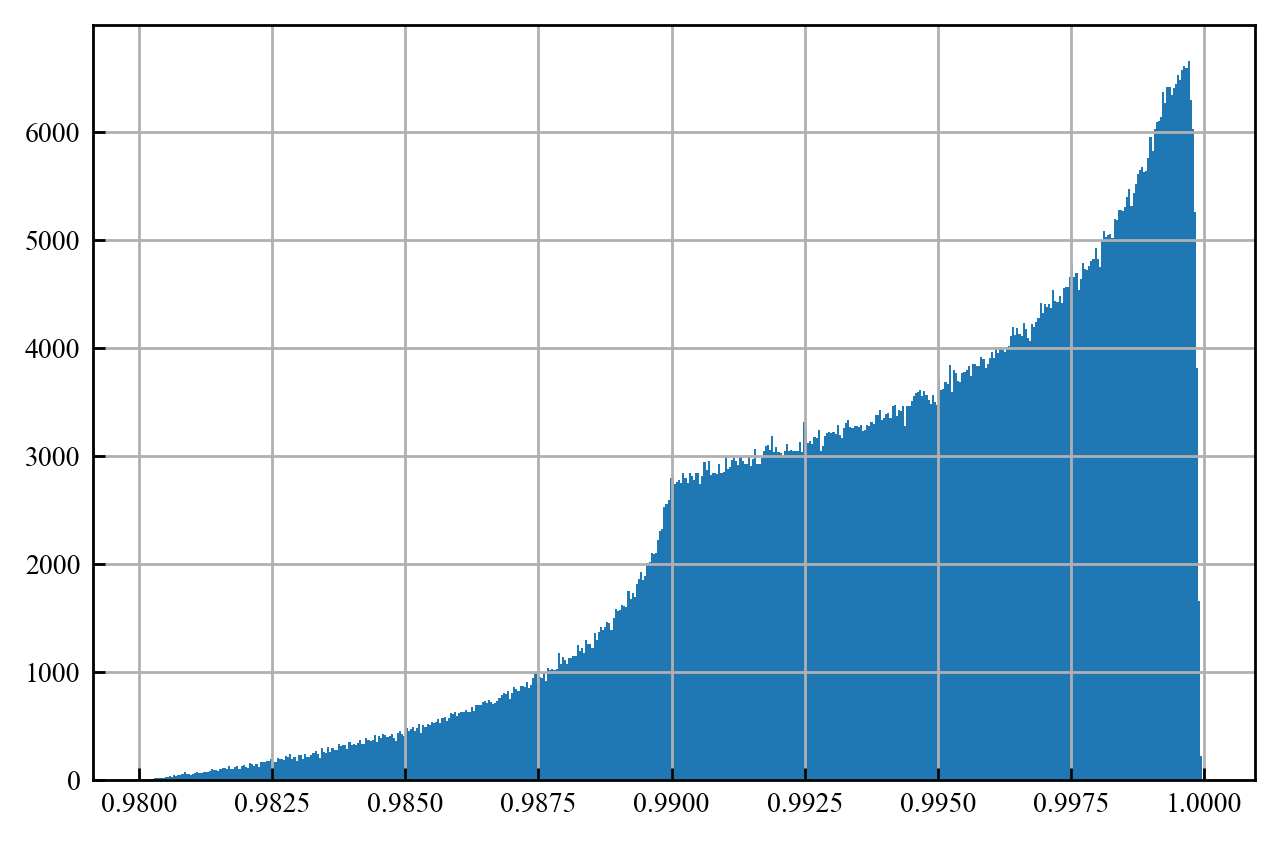

In [229]:
combined_pred_gpq.P_biased.hist(bins=500)

<AxesSubplot:>

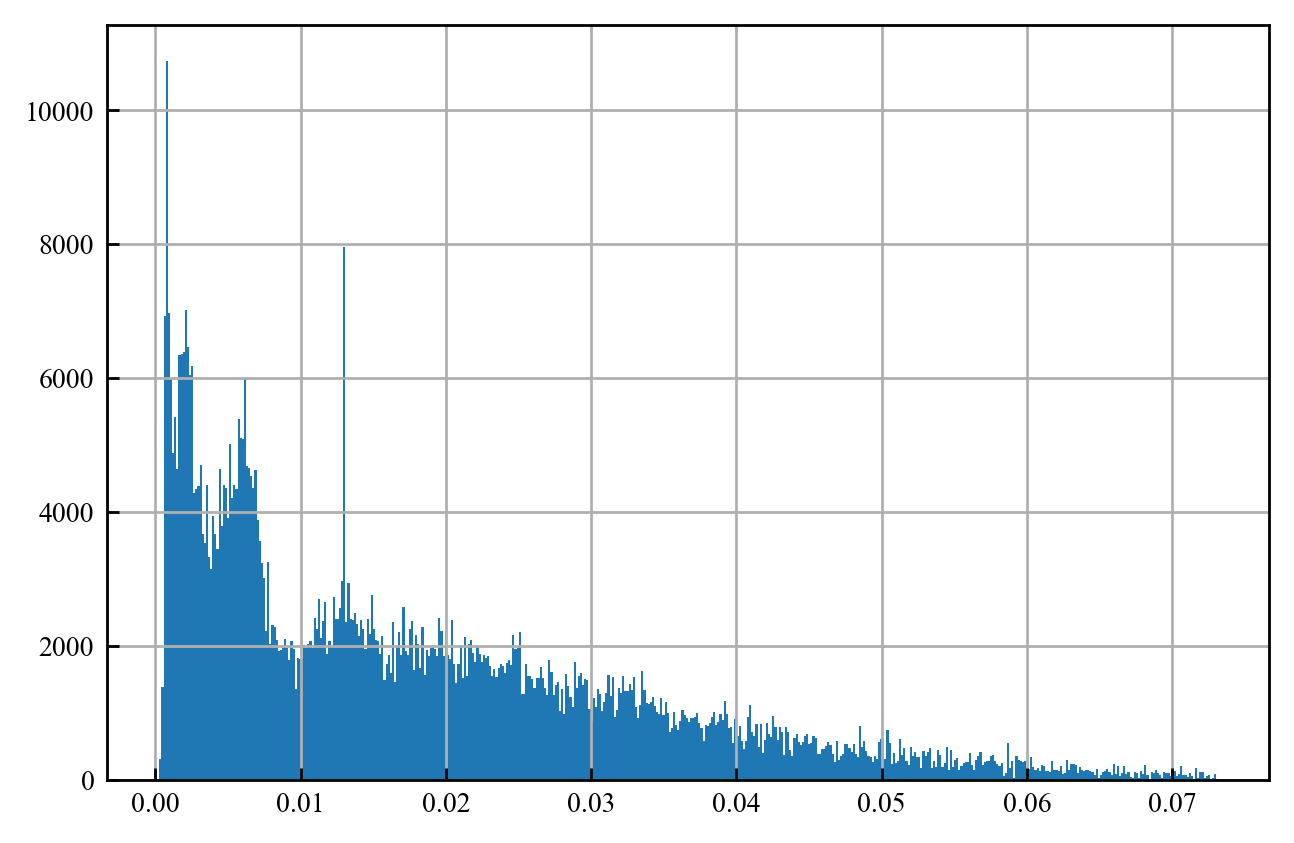

In [223]:
combined_pred_gpq.P_prior.hist(bins=500)

<AxesSubplot:>

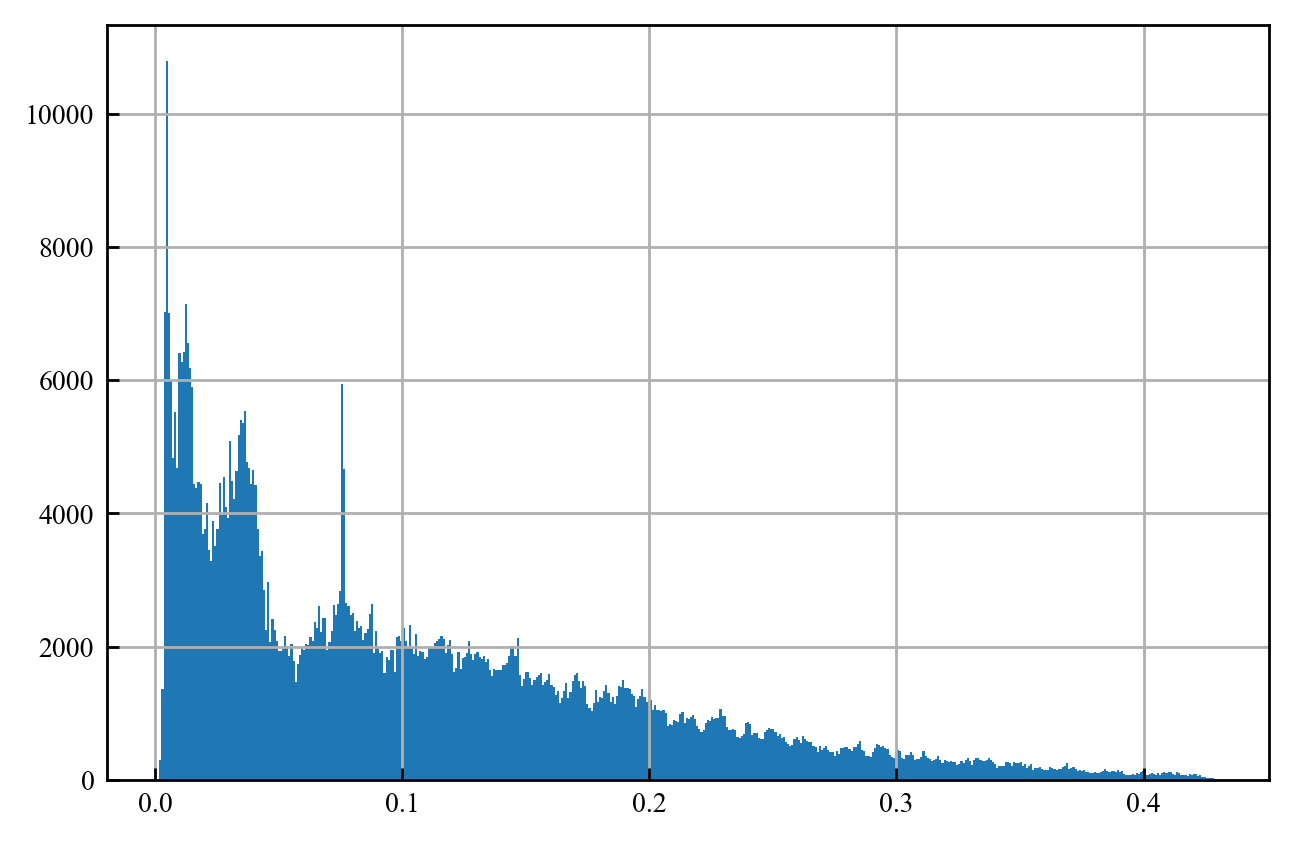

In [224]:
combined_pred_gpq.P_real.hist(bins=500)

<AxesSubplot:>

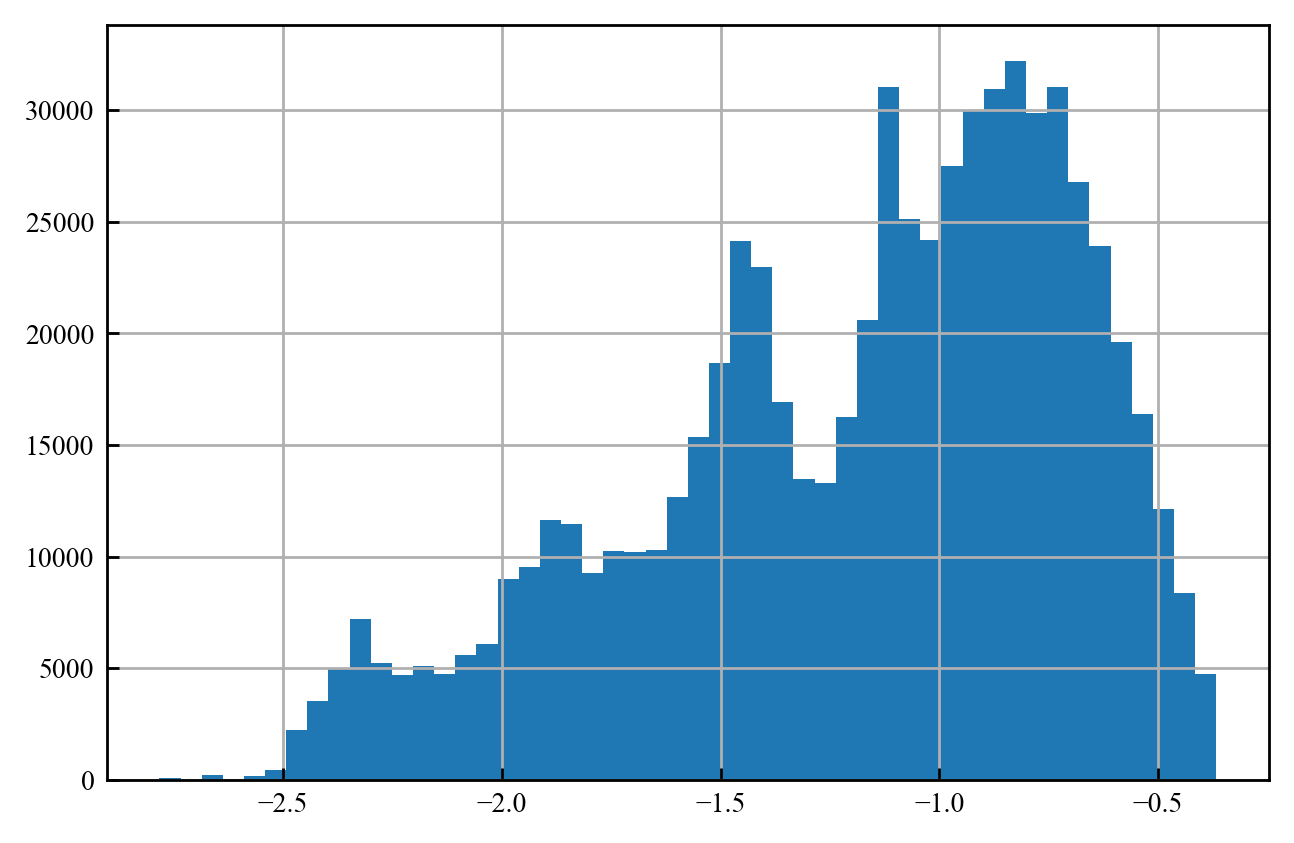

In [265]:
np.log10(combined_pred_gpq.P_real).hist(bins=50)

<AxesSubplot:>

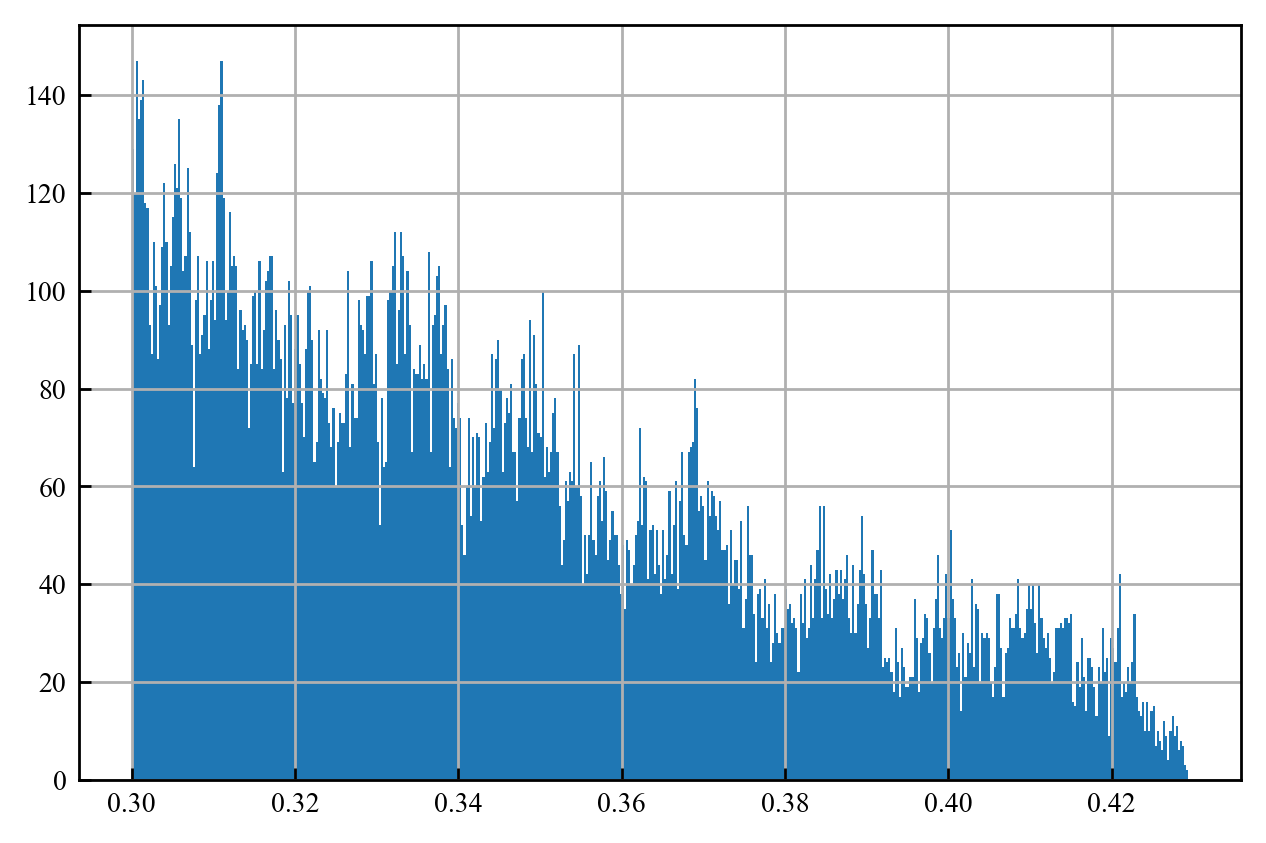

In [162]:
combined_pred_gpq[combined_pred_gpq.P_real>0.3].P_real.hist(bins=500)

## 3.3. set threshold

In [188]:
combined_pred_gpq_30 = combined_pred_gpq.query('P_real>0.3')
# plt.scatter(combined_pred_gpq_1.l, combined_pred_gpq_1.b, s=1)

In [189]:
combined_pred_gpq_30.shape,combined_pred_gpq.shape

((28591, 64), (1145937, 64))

80.00000000000003 99.99999999999997 -9.999999999999975 9.999999999999975


The area per pix is 0.052 deg^2 and the highest density per pix is 1525.092


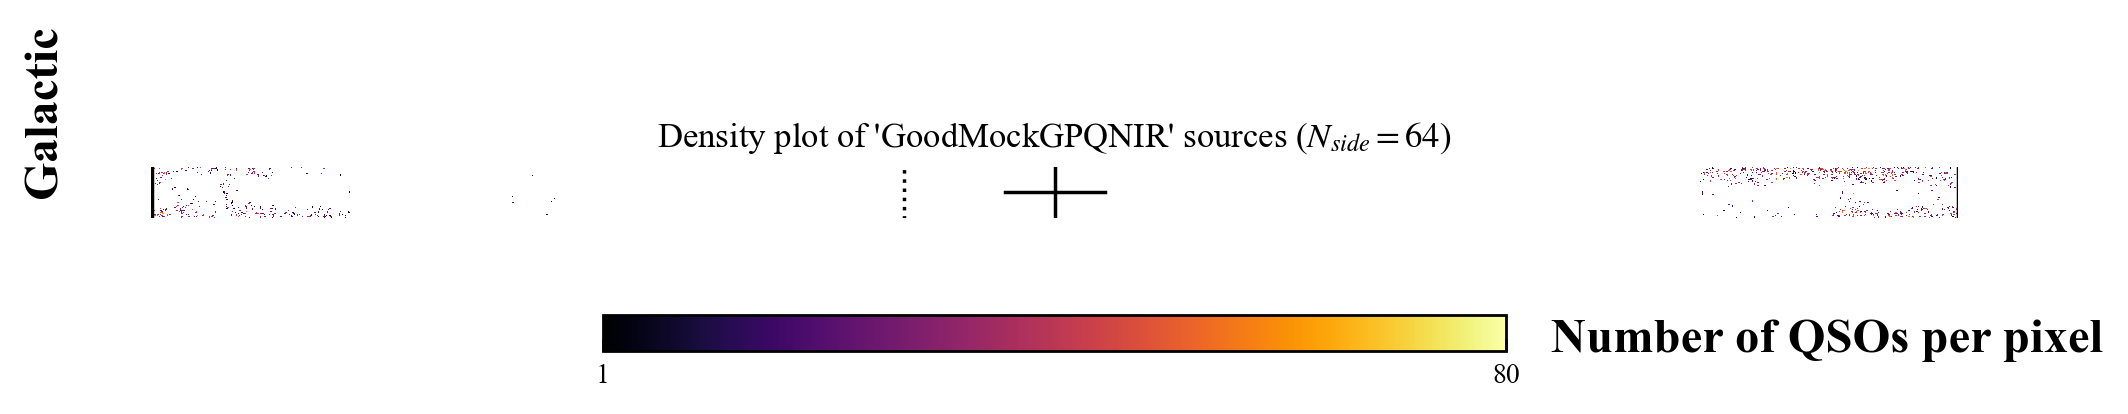

In [168]:
# nside	= 2**res	: The number of pixels per side.
# npix	= 12*nside**2	: The total number of pixels in the map.

nside = 256

hptb = combined_pred_gpq_30.groupby('n256pix').size()
npix = hp.nside2npix(nside)

pi = np.pi
ssky = 4 * pi * ((180 / pi)**2)
spix = ssky / npix
sig_max = hptb.max() / (ssky / npix)
print('The area per pix is {0:.3f} deg^2 and the highest density per\
 pix is {1:.3f}'.format(spix, sig_max))

hpxmap = np.zeros(npix, dtype=float)
for i in hptb.index.values:
    hpxmap[i] = hptb[i]  # 只填充有值的位置
# hpxmap = hpxmap/spix
hpxmap[hpxmap == 0] = 'nan'
#hpxmap[hpxmap <= 0] = hp.pixelfunc.UNSEEN

cartb = hp.cartview(hpxmap,
                    coord=["G"],
                    latra = [-5,5],  # 限制正负五度天区
                    cmap='inferno',
                    badcolor='w',
                    bgcolor='w',
                    unit="Number of QSOs per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Density plot of 'GoodMockGPQNIR' sources ($N_{side}=64$)")



# map_dump = pd.DataFrame(cartb)

hp.graticule()
f = plt.gcf()

In [150]:
combined_pred_gpq_30.columns

Index(['ra', 'dec', 'l', 'b', 'gps_pstar', 'gps_pgalaxy', 'gps_pnoise',
       'gps_psaturated', 'g', 'r', 'i', 'z', 'y', 'e_g', 'e_r', 'e_i', 'e_z',
       'e_y', 'jap', 'hap', 'kap', 'e_jap', 'e_hap', 'e_kap', 'cat_pmra',
       'cat_pmdec', 'cat_sigpmra', 'cat_sigpmdec', 'w1vega', 'w2vega', 'e_w1',
       'e_w2', 'cat_w1snr_pm', 'cat_w2snr_pm', 'cat_rchi2', 'cat_nb', 'cat_na',
       'cat_w1sat', 'cat_w2sat', 'w1ab', 'w2ab', 'jab', 'hab', 'kab', 'iz',
       'zy', 'yj', 'jh', 'hk', 'iw1', 'zw1', 'yw1', 'jw1', 'hw1', 'kw1',
       'w1w2', 'ebv', 'n64pix', 'predict_proba_1', 'predict_proba_2',
       'P_biased', 'n256pix', 'P_prior', 'P_real'],
      dtype='object')

In [161]:
combined_pred_gpq_30.to_csv('/cargo/public/catdata/gpq_nir/density_map/combined_pred_gpq_30%.csv')

# 多波段颜色cut

In [259]:
combined_pred_gpq_cut5 = combined_pred_gpq_30.query('iz<1.35 & yj>-0.8\
                                                    & (hk+0.8*jh>0.2)\
                                                    & (w1w2+0.36*yw1>-0.07)\
                                                    & (w1w2+0.33*jw1>0.01)')
combined_pred_gpq_cut5

ra        dec           l         b  gps_pstar  gps_pgalaxy  \
961      100.500886  13.435664  199.893632  4.032686   0.999981     0.000010   
2199     103.242463   9.833935  204.332466  4.803596   0.499230     0.499230   
2208     103.111367  10.036786  204.092370  4.779526   0.999981     0.000010   
2221     103.067803   9.942761  204.157254  4.698902   0.003076     0.996753   
2222     103.063874   9.981389  204.120895  4.712832   0.003076     0.996753   
...             ...        ...         ...       ...        ...          ...   
1145516   96.276911  22.118089  190.308817  4.425902   0.000010     0.999981   
1145527   96.349269  22.056879  190.394338  4.457080   0.003076     0.996753   
1145543   96.323081  22.027560  190.409171  4.422006   0.499230     0.499230   
1145544   96.399924  22.027529  190.442199  4.485173   0.999981     0.000010   
1145565   96.363485  22.439430  190.060013  4.645358   0.000010     0.999981   

         gps_pnoise  gps_psaturated        g        r  ...       kw1   w1w2  \
961        0.000010               0      NaN      NaN  ... -0.012207  0.077   
2199       0.001541               0  23.0322  22.9716  ...  0.294164  0.030   
2208       0.000010               0  22.8834  23.5330  ... -0.027192  0.130   
2221       0.000171               0  22.4633  20.9750  ...  0.087455  0.213   
2222       0.000171               0      NaN  22.2521  ...  0.557084  0.018   
...             ...             ...      ...      ...  ...       ...    ...   
1145516    0.000010               0  26.5075  22.3491  ...  1.013232 -0.130   
1145527    0.000171               0  22.7574  21.7436  ... -0.459003  0.433   
1145543    0.001541               0  23.4048  22.8487  ...  0.647307 -0.079   
1145544    0.000010               0      NaN      NaN  ... -0.567951  0.192   
1145565    0.000010               0  24.5764  22.9461  ...  0.626854 -0.071   

              ebv  n64pix  predict_proba_1  predict_proba_2  P_biased  \
961      0.322054   22798         0.999823         0.999612  0.999434   
2199     0.259561   22545         0.999899         0.998878  0.998776   
2208     0.247447   22545         0.999569         0.998050  0.997620   
2221     0.250370   22545         0.999726         0.999318  0.999045   
2222     0.246746   22545         0.999839         0.991826  0.991666   
...           ...     ...              ...              ...       ...   
1145516  0.525419   22535         0.999351         0.999338  0.998689   
1145527  0.537195   22535         0.993773         0.991173  0.985000   
1145543  0.538023   22535         0.999180         0.995905  0.995088   
1145544  0.524802   22535         0.996452         0.996329  0.992794   
1145565  0.571089   22535         0.999955         0.993628  0.993583   

         n256pix   P_prior    P_real  
961       365625  0.051178  0.300875  
2199      360517  0.063797  0.374818  
2208      360516  0.052197  0.306308  
2221      360516  0.052197  0.306745  
2222      360516  0.052197  0.304480  
...          ...       ...       ...  
1145516   362525  0.055474  0.325890  
1145527   362525  0.055474  0.321423  
1145543   362525  0.055474  0.324715  
1145544   362525  0.055474  0.323967  
1145565   361501  0.063691  0.372252  

[4222 rows x 64 columns]

In [260]:
combined_pred_gpq_cut5.to_csv('/cargo/public/catdata/gpq_nir/density_map/combined_pred_gpq_30%_cut5.csv')

## 画一下类星体候选体的天区分布

In [7]:
combined_pred_gpq_30 = pd.read_csv('/cargo/public/catdata/gpq_nir/density_map/combined_pred_gpq_30%.csv')

In [4]:
combined_pred_gpq_cut5 = pd.read_csv('/cargo/public/catdata/gpq_nir/density_map/combined_pred_gpq_30%_cut5.csv')

In [18]:
combined_pred_gpq_cut5.columns

Index(['Unnamed: 0', 'ra', 'dec', 'l', 'b', 'gps_pstar', 'gps_pgalaxy',
       'gps_pnoise', 'gps_psaturated', 'g', 'r', 'i', 'z', 'y', 'e_g', 'e_r',
       'e_i', 'e_z', 'e_y', 'jap', 'hap', 'kap', 'e_jap', 'e_hap', 'e_kap',
       'cat_pmra', 'cat_pmdec', 'cat_sigpmra', 'cat_sigpmdec', 'w1vega',
       'w2vega', 'e_w1', 'e_w2', 'cat_w1snr_pm', 'cat_w2snr_pm', 'cat_rchi2',
       'cat_nb', 'cat_na', 'cat_w1sat', 'cat_w2sat', 'w1ab', 'w2ab', 'jab',
       'hab', 'kab', 'iz', 'zy', 'yj', 'jh', 'hk', 'iw1', 'zw1', 'yw1', 'jw1',
       'hw1', 'kw1', 'w1w2', 'ebv', 'n64pix', 'predict_proba_1',
       'predict_proba_2', 'P_biased', 'n256pix', 'P_prior', 'P_real'],
      dtype='object')

80.00000000000003 99.99999999999997 -9.999999999999975 9.999999999999975


The area per pix is 0.839 deg^2 and the highest density per pix is 50.042


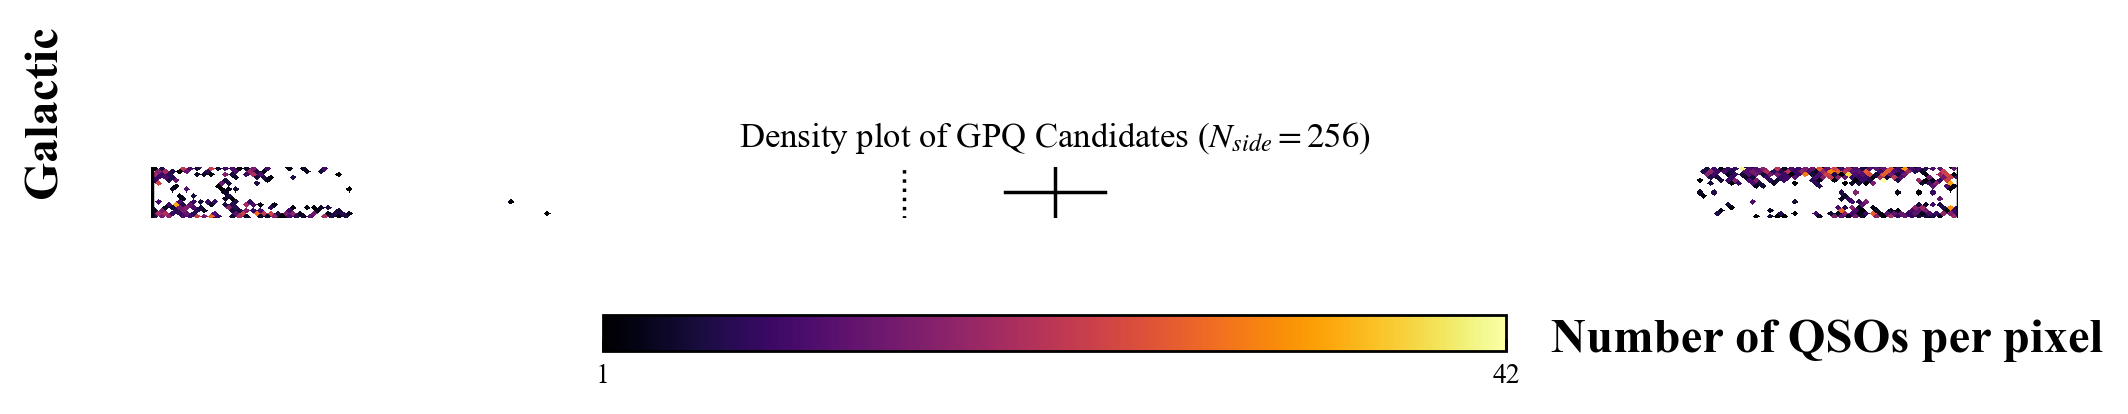

In [19]:
# nside	= 2**res	: The number of pixels per side.
# npix	= 12*nside**2	: The total number of pixels in the map.

nside = 64

hptb = combined_pred_gpq_cut5.groupby('n64pix').size()
npix = hp.nside2npix(nside)

pi = np.pi
ssky = 4 * pi * ((180 / pi)**2)
spix = ssky / npix
sig_max = hptb.max() / (ssky / npix)
print('The area per pix is {0:.3f} deg^2 and the highest density per\
 pix is {1:.3f}'.format(spix, sig_max))

hpxmap = np.zeros(npix, dtype=float)
for i in hptb.index.values:
    hpxmap[i] = hptb[i]  # 只填充有值的位置
# hpxmap = hpxmap/spix
hpxmap[hpxmap == 0] = 'nan'
#hpxmap[hpxmap <= 0] = hp.pixelfunc.UNSEEN

cartb = hp.cartview(hpxmap,
                    coord=["G"],
                    latra = [-5,5],  # 限制正负五度天区
                    cmap='inferno',
                    badcolor='w',
                    bgcolor='w',
                    unit="Number of QSOs per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Density plot of GPQ Candidates ($N_{side}=256$)")



map_dump = pd.DataFrame(cartb)

hp.graticule()
f = plt.gcf()

In [11]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE, family='serif')    # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.rc('font', family='serif')    # controls default text sizes
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

# plt.rcParams["figure.figsize"] = (10,4) # 调整图片尺寸
plt.rcParams["figure.dpi"] = 250 # 提高图片分辨率

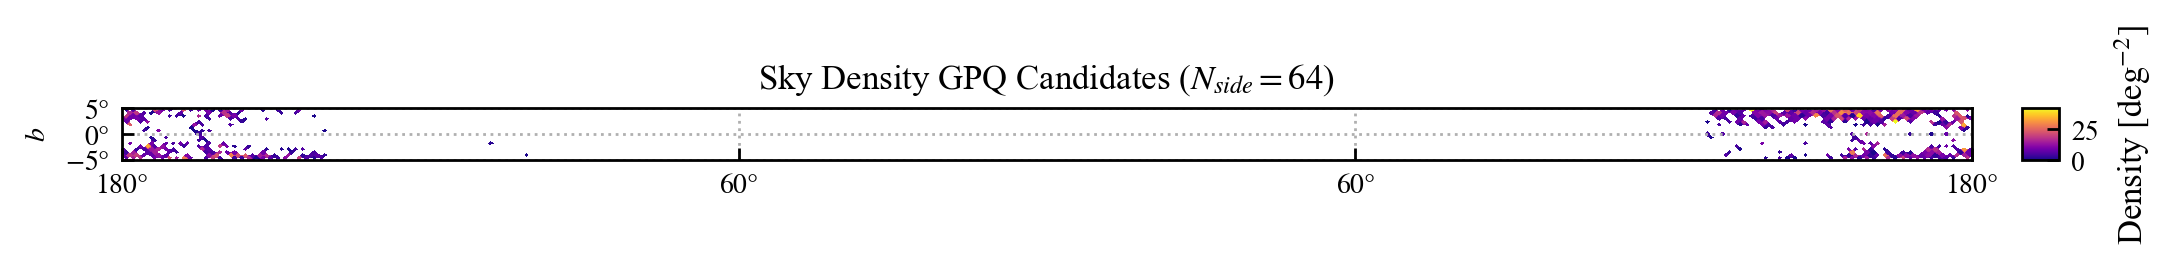

In [23]:
# sky density

cand_b5 = map_dump.values

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='2%', pad=0.2)
im = ax1.imshow(cand_b5.data,
                origin='lower',
                cmap='plasma',
                 norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cand_b5))
               )
ax1.set_xticks(np.arange(0, 1801, 600))
ax1.set_xticklabels((r'$180\degree$',r'$60\degree$',
                      r'$60\degree$',r'$180\degree$'))

ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]')
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('Sky Density GPQ Candidates ($N_{side}=64$) ')

fig.savefig('/cargo/public/catdata/figures/GPQ_Candidates_densitymap.pdf',dpi=300)

## 下面是64 pixel的结果

In [31]:
# combined_pred_gpq.P_real.describe()

count    1.249305e+06
mean     3.352892e-03
std      3.784990e-03
min      8.060374e-06
25%      6.980939e-05
50%      1.496890e-03
75%      6.423586e-03
max      3.584061e-01
Name: P_real, dtype: float64

In [33]:
# combined_pred_gpq.P_prior.describe()

count    1.249305e+06
mean     6.743079e-04
std      7.610509e-04
min      1.644661e-06
25%      1.407398e-05
50%      3.011926e-04
75%      1.294352e-03
max      7.171155e-02
Name: P_prior, dtype: float64

<AxesSubplot:>

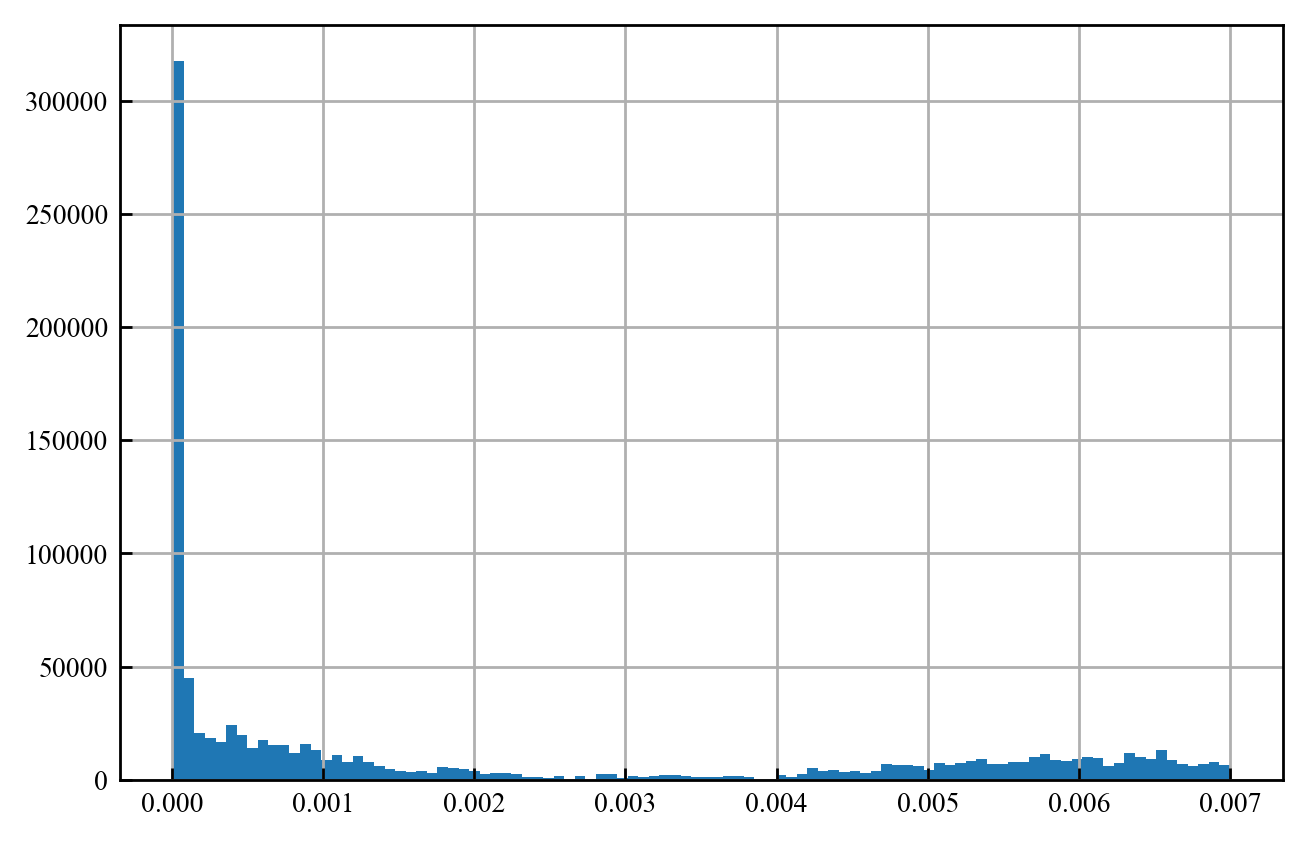

In [47]:
# combined_pred_gpq[combined_pred_gpq.P_real<0.007].P_real.hist(bins=100)

(array([2.47085e+05, 2.44000e+03, 3.36500e+03, 3.65800e+03, 4.65600e+03,
        6.06000e+03, 1.24010e+04, 1.20320e+04, 9.40400e+03, 1.11020e+04,
        1.14490e+04, 1.52450e+04, 1.48680e+04, 1.25400e+04, 1.05310e+04,
        1.49530e+04, 1.56320e+04, 1.90930e+04, 3.11100e+04, 2.30920e+04,
        3.40740e+04, 3.30930e+04, 3.46230e+04, 3.23530e+04, 2.14440e+04,
        2.36240e+04, 1.41440e+04, 1.39390e+04, 1.57710e+04, 5.83840e+04,
        1.39106e+05, 1.77241e+05, 1.34328e+05, 3.21850e+04, 2.71700e+03,
        6.80000e+02, 1.62000e+02, 3.21000e+02, 1.93000e+02, 9.00000e+00,
        1.10000e+01, 5.60000e+01, 1.80000e+01, 0.00000e+00, 8.30000e+01,
        1.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.20000e+01]),
 array([-5.09364481, -5.0006844 , -4.907724  , -4.81476359, -4.72180319,
        -4.62884278, -4.53588238, -4.44292197, -4.34996157, -4.25700116,
        -4.16404076, -4.07108036, -3.97811995, -3.88515955, -3.79219914,
        -3.69923874, -3.60627833, -3.51331793, -3

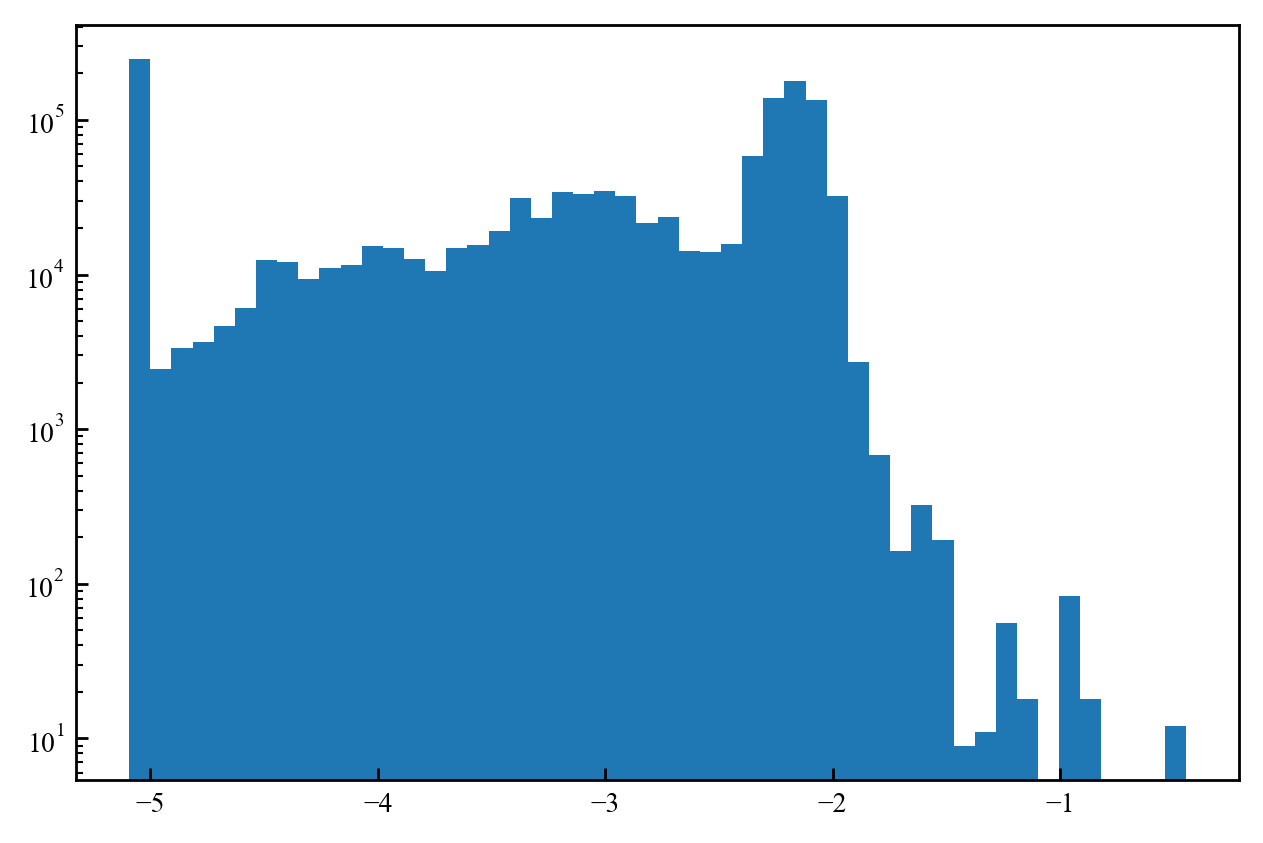

In [41]:
# plt.hist(np.log10(combined_pred_gpq.P_real), log=True,bins=50)

# 以下计算是不对的👇

In [29]:
# predicted gpq的天区密度
hpxmap.shape

(49152,)

In [30]:
# 机器学习预测为类星体的占比: predicted gpq的天区密度/combined_hpxmap.D_goodph
pred_proba = hpxmap/combined_hpxmap.D_goodph
pred_proba

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
49147   NaN
49148   NaN
49149   NaN
49150   NaN
49151   NaN
Name: D_goodph, Length: 49152, dtype: float64

In [32]:
combined_hpxmap

iring  inest  D_all  D_goodph  D_old  D_goodqso  D_new_  D_new_low  \
0          0   4095    NaN       NaN    NaN  48.850602     NaN        NaN   
1          1   8191    NaN       NaN    NaN  58.382427     NaN        NaN   
2          2  12287    NaN       NaN    NaN  47.659124     NaN        NaN   
3          3  16383    NaN       NaN    NaN  47.659124     NaN        NaN   
4          4   4094    NaN       NaN    NaN  66.722774     NaN        NaN   
...      ...    ...    ...       ...    ...        ...     ...        ...   
49147  49147  45057    NaN       NaN    NaN        NaN     NaN        NaN   
49148  49148  32768    NaN       NaN    NaN        NaN     NaN        NaN   
49149  49149  36864    NaN       NaN    NaN        NaN     NaN        NaN   
49150  49150  40960    NaN       NaN    NaN        NaN     NaN        NaN   
49151  49151  45056    NaN       NaN    NaN        NaN     NaN        NaN   

       P_prior  P_prior_refined  
0          NaN         0.000001  
1          NaN         0.000001  
2          NaN         0.000001  
3          NaN         0.000001  
4          NaN         0.000001  
...        ...              ...  
49147      NaN         0.000001  
49148      NaN         0.000001  
49149      NaN         0.000001  
49150      NaN         0.000001  
49151      NaN         0.000001  

[49152 rows x 10 columns]

In [33]:
# 先验概率
prior_proba = combined_hpxmap.P_prior_refined
prior_proba

0        0.000001
1        0.000001
2        0.000001
3        0.000001
4        0.000001
           ...   
49147    0.000001
49148    0.000001
49149    0.000001
49150    0.000001
49151    0.000001
Name: P_prior_refined, Length: 49152, dtype: float64

In [34]:
# 后验概率
posterior_proba = prior_proba*pred_proba
posterior_proba

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
49147   NaN
49148   NaN
49149   NaN
49150   NaN
49151   NaN
Length: 49152, dtype: float64

In [35]:
# 先验概率
prior_proba.describe()

count    49152.000000
mean         0.000028
std          0.000338
min          0.000001
25%          0.000001
50%          0.000001
75%          0.000001
max          0.052930
Name: P_prior_refined, dtype: float64

In [36]:
# 机器学习预测为类星体的占比
pred_proba.describe()

count    3.132000e+03
mean    -1.204299e+27
std      3.360381e+28
min     -1.637500e+30
25%      3.697663e-03
50%      1.220685e-02
75%      2.912423e-02
max      9.913098e-02
Name: D_goodph, dtype: float64

In [82]:
# 后验概率
posterior_proba.describe()

count    2.208000e+03
mean     1.387420e-05
std      3.393395e-05
min      1.580723e-11
25%      3.726488e-07
50%      8.046810e-06
75%      2.153915e-05
max      1.213285e-03
dtype: float64

In [92]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

plt.rcParams["figure.figsize"] = (8,5) # 调整图片尺寸
plt.rcParams["figure.dpi"] = 150 # 提高图片分辨率

<AxesSubplot:>

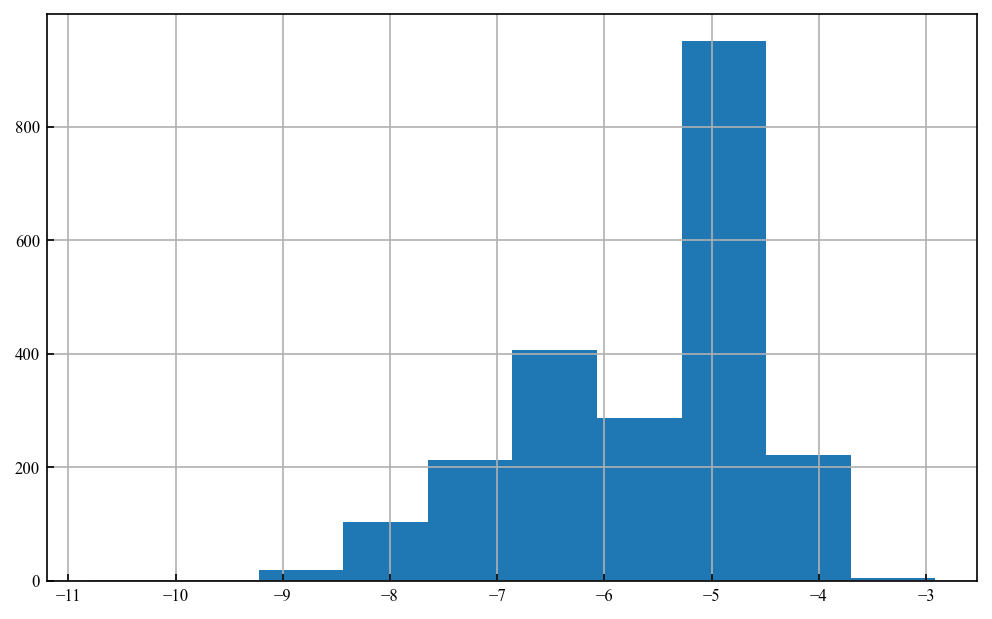

In [93]:
np.log10(posterior_proba).hist()

In [94]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE, family='serif')    # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.rc('font', family='serif')    # controls default text sizes
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

# plt.rcParams["figure.figsize"] = (10,4) # 调整图片尺寸
plt.rcParams["figure.dpi"] = 250 # 提高图片分辨率

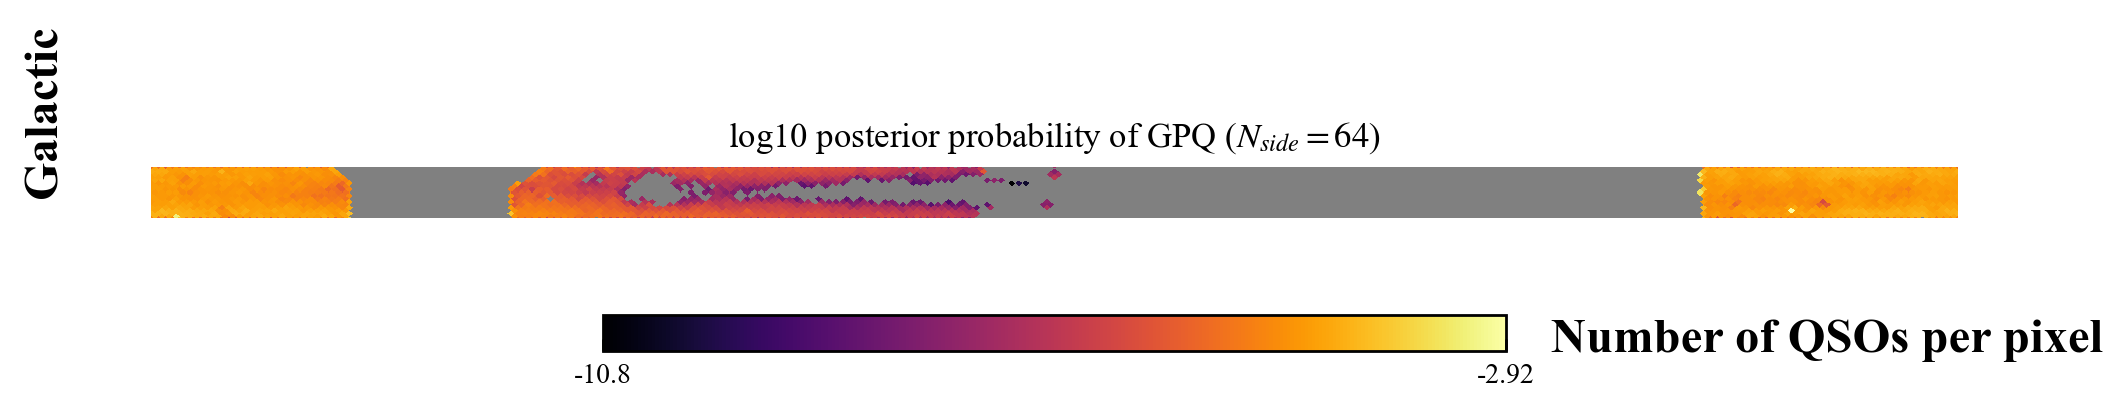

In [103]:
cartb_post = hp.cartview(np.log10(posterior_proba).values,
                    coord=["G"],
                    latra = [-5,5],  # 限制正负五度天区
                    cmap='inferno',
#             badcolor='w',
#             bgcolor='w',
                    unit="Number of QSOs per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="log10 posterior probability of GPQ ($N_{side}=64$)")


map_dump_post = pd.DataFrame(cartb_post)

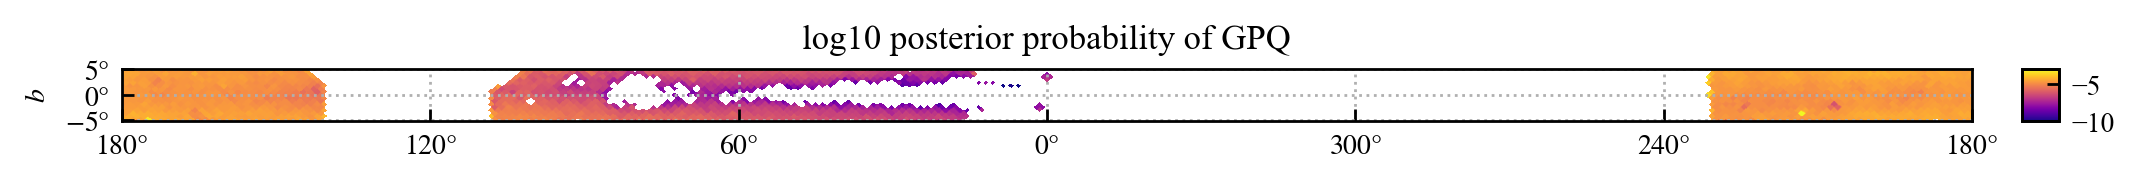

In [115]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='2%', pad=0.2)
im = ax1.imshow(map_dump_post.values,
                origin='lower',
                cmap='plasma',
 #           norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(map_dump_post.values))
               )
ax1.set_xticks(np.arange(0, 1801, 300))
ax1.set_xticklabels((r'$180\degree$',r'$120\degree$',r'$60\degree$',
                      r'$0\degree$',r'$300\degree$',r'$240\degree$',
                      r'$180\degree$'))
ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density Ratio')
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('log10 posterior probability of GPQ')


im.set_clim(-10,-3)
plt.colorbar(im, cax=cax)
plt.show()